In [1]:
import matplotlib.pyplot as plt
import tensorflow.keras as k
import numpy as np
from scipy.stats import norm
from time import time
from sklearn.utils import shuffle

In [2]:

def blackScholesPriceTrue(fwd, strike, mat, vol):
    sqt = vol * np.sqrt(mat)
    d1 = (np.log(fwd / strike) + 0.5 * vol* vol * mat)/sqt
    d2 = d1 - sqt
    n1 = norm.cdf(d1)
    n2 = norm.cdf(d2)
    return n1 - strike/fwd * n2

def createDataset(size):
    f = np.linspace(0.5,1.5, size)
    strike = np.linspace(0.5,1.5, size)
    T = np.linspace(0.1,1,size)
    vol = np.linspace(0.01, 0.5, size)
    inputs = np.array(np.meshgrid(f,strike,T,vol)).T.reshape(-1, 4)
    options = blackScholesPriceTrue(inputs[:,0],inputs[:,1], inputs[:,2], inputs[:,3])
    return inputs, options

class OptionsSequence(k.utils.Sequence):

    def __init__(self, dataSetSize, batch_size):
        x, y = createDataset(dataSetSize)
        self.x, self.y = shuffle(x,y, random_state=0)
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size,:]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x, batch_y = shuffle(batch_x, batch_y, random_state=0)
        return batch_x, batch_y


In [3]:

def add_normalized_layer(h_units, activation='relu'):
    return [
        k.layers.Dense(h_units, use_bias=False),
        k.layers.BatchNormalization(),
        k.layers.Activation(activation)
            ]

def create_model(h_layers, h_units, modelFile = None):
    layers = [k.layers.Dense(units=h_units,  input_dim=4)]
    layers +=[k.layers.Dropout(rate=0.8)]
    for _ in range(h_layers):
        layers += add_normalized_layer(h_units)
    layers += [k.layers.Dense(units=1, activation='elu')]
    model = k.models.Sequential(layers)
    optimizer = k.optimizers.RMSprop(lr=0.001)
    model.compile(optimizer=optimizer, loss='mse')
    if modelFile is not None:
        try:
            model.load_weights(modelFile)
        except:
            pass
    return model


In [4]:

generator = OptionsSequence(10,200)
val_generator = OptionsSequence(5, 5**4)


In [5]:
modelFile = 'bsPricerModel.hdf5'
layers = 8
hidden_units = 256
model = create_model(layers, hidden_units, modelFile)

epochs = 100
checkpoint = k.callbacks.ModelCheckpoint(modelFile,monitor='val_loss')
tensorboard = k.callbacks.TensorBoard(log_dir='LOGS\\{}'.format(time()), histogram_freq=1, write_graph=True)
model.fit_generator(generator=generator, epochs=epochs, validation_data=val_generator, validation_freq=2, 
                    workers=4, verbose=1, callbacks=[checkpoint, tensorboard])


W0323 13:31:00.105389 22608 deprecation.py:506] From D:\Projects\TweetGenerator\venvp37t2\lib\site-packages\tensorflow\python\ops\init_ops.py:1257: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/100


 1/50 [..............................] - ETA: 5:28 - loss: 0.5205

W0323 13:31:08.347426 22608 callbacks.py:236] Method (on_train_batch_end) is slow compared to the batch update (0.210518). Check your callbacks.


 2/50 [>.............................] - ETA: 2:44 - loss: 0.6594

W0323 13:31:08.374386 22608 callbacks.py:236] Method (on_train_batch_end) is slow compared to the batch update (0.125039). Check your callbacks.


 4/50 [=>............................] - ETA: 1:19 - loss: 0.7897

 6/50 [==>...........................] - ETA: 51s - loss: 0.6681 

 8/50 [===>..........................] - ETA: 36s - loss: 0.5805



11/50 [=====>........................] - ETA: 25s - loss: 0.4897

13/50 [======>.......................] - ETA: 20s - loss: 0.4575



15/50 [========>.....................] - ETA: 16s - loss: 0.4287

17/50 [=========>....................] - ETA: 14s - loss: 0.4003

19/50 [==========>...................] - ETA: 11s - loss: 0.3795

22/50 [============>.................] - ETA: 9s - loss: 0.3532 

25/50 [==============>...............] - ETA: 7s - loss: 0.3381

27/50 [===============>..............] - ETA: 6s - loss: 0.3275

30/50 [=================>............] - ETA: 5s - loss: 0.3094



32/50 [==================>...........] - ETA: 4s - loss: 0.3017

34/50 [===================>..........] - ETA: 3s - loss: 0.2934

37/50 [=====================>........] - ETA: 2s - loss: 0.2802

39/50 [======================>.......] - ETA: 2s - loss: 0.2746

42/50 [========================>.....] - ETA: 1s - loss: 0.2674



45/50 [==========================>...] - ETA: 0s - loss: 0.2577

47/50 [===========================>..] - ETA: 0s - loss: 0.2517

49/50 [============================>.] - ETA: 0s - loss: 0.2463

50/50 [==============================] - 9s 187ms/step - loss: 0.2439


Epoch 2/100
 1/50 [..............................] - ETA: 1s - loss: 0.0999

 3/50 [>.............................] - ETA: 1s - loss: 0.1312

 5/50 [==>...........................] - ETA: 1s - loss: 0.1450

 7/50 [===>..........................] - ETA: 1s - loss: 0.1411

 9/50 [====>.........................] - ETA: 1s - loss: 0.1365

11/50 [=====>........................] - ETA: 1s - loss: 0.1419

13/50 [======>.......................] - ETA: 1s - loss: 0.1414

15/50 [========>.....................] - ETA: 0s - loss: 0.1356

17/50 [=========>....................] - ETA: 0s - loss: 0.1304

19/50 [==========>...................] - ETA: 0s - loss: 0.1272

21/50 [===========>..................] - ETA: 0s - loss: 0.1262

23/50 [============>.................] - ETA: 0s - loss: 0.1253

25/50 [==============>...............] - ETA: 0s - loss: 0.1240

27/50 [===============>..............] - ETA: 0s - loss: 0.1213

30/50 [=================>............] - ETA: 0s - loss: 0.1208

33/50 [==================>...........] - ETA: 0s - loss: 0.1172

35/50 [====================>.........] - ETA: 0s - loss: 0.1166



38/50 [=====================>........] - ETA: 0s - loss: 0.1145

40/50 [=======================>......] - ETA: 0s - loss: 0.1132



42/50 [========================>.....] - ETA: 0s - loss: 0.1120

44/50 [=========================>....] - ETA: 0s - loss: 0.1104

47/50 [===========================>..] - ETA: 0s - loss: 0.1079

49/50 [============================>.] - ETA: 0s - loss: 0.1060

50/50 [==============================] - 2s 43ms/step - loss: 0.1051 - val_loss: 0.0507


Epoch 3/100
 1/50 [..............................] - ETA: 1s - loss: 0.0500

 3/50 [>.............................] - ETA: 1s - loss: 0.0607

 5/50 [==>...........................] - ETA: 1s - loss: 0.0665

 7/50 [===>..........................] - ETA: 1s - loss: 0.0681

 9/50 [====>.........................] - ETA: 1s - loss: 0.0675

11/50 [=====>........................] - ETA: 1s - loss: 0.0672

13/50 [======>.......................] - ETA: 1s - loss: 0.0640

15/50 [========>.....................] - ETA: 0s - loss: 0.0631

17/50 [=========>....................] - ETA: 0s - loss: 0.0611

19/50 [==========>...................] - ETA: 0s - loss: 0.0604

21/50 [===========>..................] - ETA: 0s - loss: 0.0592

23/50 [============>.................] - ETA: 0s - loss: 0.0595

25/50 [==============>...............] - ETA: 0s - loss: 0.0578

27/50 [===============>..............] - ETA: 0s - loss: 0.0556

30/50 [=================>............] - ETA: 0s - loss: 0.0535

32/50 [==================>...........] - ETA: 0s - loss: 0.0523

34/50 [===================>..........] - ETA: 0s - loss: 0.0512

36/50 [====================>.........] - ETA: 0s - loss: 0.0502

38/50 [=====================>........] - ETA: 0s - loss: 0.0499

40/50 [=======================>......] - ETA: 0s - loss: 0.0489

42/50 [========================>.....] - ETA: 0s - loss: 0.0475

44/50 [=========================>....] - ETA: 0s - loss: 0.0462

46/50 [==========================>...] - ETA: 0s - loss: 0.0451

48/50 [===========================>..] - ETA: 0s - loss: 0.0442

50/50 [==============================] - 2s 34ms/step - loss: 0.0438


Epoch 4/100
 1/50 [..............................] - ETA: 1s - loss: 0.0192

 3/50 [>.............................] - ETA: 1s - loss: 0.0187

 5/50 [==>...........................] - ETA: 1s - loss: 0.0201

 7/50 [===>..........................] - ETA: 1s - loss: 0.0197

 9/50 [====>.........................] - ETA: 1s - loss: 0.0194

11/50 [=====>........................] - ETA: 1s - loss: 0.0194

14/50 [=======>......................] - ETA: 0s - loss: 0.0188

16/50 [========>.....................] - ETA: 0s - loss: 0.0182



18/50 [=========>....................] - ETA: 0s - loss: 0.0180

20/50 [===========>..................] - ETA: 0s - loss: 0.0180

22/50 [============>.................] - ETA: 0s - loss: 0.0178

24/50 [=============>................] - ETA: 0s - loss: 0.0177

26/50 [==============>...............] - ETA: 0s - loss: 0.0172

29/50 [================>.............] - ETA: 0s - loss: 0.0168

31/50 [=================>............] - ETA: 0s - loss: 0.0165

33/50 [==================>...........] - ETA: 0s - loss: 0.0168

36/50 [====================>.........] - ETA: 0s - loss: 0.0162



38/50 [=====================>........] - ETA: 0s - loss: 0.0163

40/50 [=======================>......] - ETA: 0s - loss: 0.0160

42/50 [========================>.....] - ETA: 0s - loss: 0.0157

44/50 [=========================>....] - ETA: 0s - loss: 0.0154



47/50 [===========================>..] - ETA: 0s - loss: 0.0151

49/50 [============================>.] - ETA: 0s - loss: 0.0148

50/50 [==============================] - 2s 37ms/step - loss: 0.0148 - val_loss: 0.0396


Epoch 5/100
 1/50 [..............................] - ETA: 1s - loss: 0.0129

 3/50 [>.............................] - ETA: 1s - loss: 0.0124

 5/50 [==>...........................] - ETA: 1s - loss: 0.0099

 7/50 [===>..........................] - ETA: 1s - loss: 0.0097

 9/50 [====>.........................] - ETA: 1s - loss: 0.0097

11/50 [=====>........................] - ETA: 1s - loss: 0.0113

13/50 [======>.......................] - ETA: 1s - loss: 0.0111

15/50 [========>.....................] - ETA: 0s - loss: 0.0105

17/50 [=========>....................] - ETA: 0s - loss: 0.0101

19/50 [==========>...................] - ETA: 0s - loss: 0.0110

22/50 [============>.................] - ETA: 0s - loss: 0.0102

25/50 [==============>...............] - ETA: 0s - loss: 0.0100

27/50 [===============>..............] - ETA: 0s - loss: 0.0098

29/50 [================>.............] - ETA: 0s - loss: 0.0097

31/50 [=================>............] - ETA: 0s - loss: 0.0096

33/50 [==================>...........] - ETA: 0s - loss: 0.0094

35/50 [====================>.........] - ETA: 0s - loss: 0.0093

37/50 [=====================>........] - ETA: 0s - loss: 0.0091

39/50 [======================>.......] - ETA: 0s - loss: 0.0090

41/50 [=======================>......] - ETA: 0s - loss: 0.0088

43/50 [========================>.....] - ETA: 0s - loss: 0.0087

45/50 [==========================>...] - ETA: 0s - loss: 0.0089

48/50 [===========================>..] - ETA: 0s - loss: 0.0086

50/50 [==============================] - 2s 36ms/step - loss: 0.0086


Epoch 6/100
 1/50 [..............................] - ETA: 1s - loss: 0.0137

 3/50 [>.............................] - ETA: 1s - loss: 0.0100

 5/50 [==>...........................] - ETA: 1s - loss: 0.0089

 7/50 [===>..........................] - ETA: 1s - loss: 0.0087

 9/50 [====>.........................] - ETA: 1s - loss: 0.0087

11/50 [=====>........................] - ETA: 1s - loss: 0.0097

13/50 [======>.......................] - ETA: 1s - loss: 0.0092

16/50 [========>.....................] - ETA: 0s - loss: 0.0084

18/50 [=========>....................] - ETA: 0s - loss: 0.0081

20/50 [===========>..................] - ETA: 0s - loss: 0.0076

23/50 [============>.................] - ETA: 0s - loss: 0.0072

25/50 [==============>...............] - ETA: 0s - loss: 0.0069



27/50 [===============>..............] - ETA: 0s - loss: 0.0068

29/50 [================>.............] - ETA: 0s - loss: 0.0070

31/50 [=================>............] - ETA: 0s - loss: 0.0071

33/50 [==================>...........] - ETA: 0s - loss: 0.0070

35/50 [====================>.........] - ETA: 0s - loss: 0.0070

37/50 [=====================>........] - ETA: 0s - loss: 0.0069



40/50 [=======================>......] - ETA: 0s - loss: 0.0067

42/50 [========================>.....] - ETA: 0s - loss: 0.0068



44/50 [=========================>....] - ETA: 0s - loss: 0.0068

46/50 [==========================>...] - ETA: 0s - loss: 0.0066

48/50 [===========================>..] - ETA: 0s - loss: 0.0065

50/50 [==============================] - 2s 37ms/step - loss: 0.0065 - val_loss: 0.0680


Epoch 7/100
 1/50 [..............................] - ETA: 2s - loss: 0.0065

 3/50 [>.............................] - ETA: 1s - loss: 0.0059

 5/50 [==>...........................] - ETA: 1s - loss: 0.0054

 8/50 [===>..........................] - ETA: 1s - loss: 0.0053

10/50 [=====>........................] - ETA: 1s - loss: 0.0053



12/50 [======>.......................] - ETA: 1s - loss: 0.0050

14/50 [=======>......................] - ETA: 1s - loss: 0.0048

16/50 [========>.....................] - ETA: 0s - loss: 0.0051

18/50 [=========>....................] - ETA: 0s - loss: 0.0050



21/50 [===========>..................] - ETA: 0s - loss: 0.0049

23/50 [============>.................] - ETA: 0s - loss: 0.0051

25/50 [==============>...............] - ETA: 0s - loss: 0.0051

27/50 [===============>..............] - ETA: 0s - loss: 0.0053

29/50 [================>.............] - ETA: 0s - loss: 0.0054

31/50 [=================>............] - ETA: 0s - loss: 0.0055

33/50 [==================>...........] - ETA: 0s - loss: 0.0055

35/50 [====================>.........] - ETA: 0s - loss: 0.0056

37/50 [=====================>........] - ETA: 0s - loss: 0.0055

39/50 [======================>.......] - ETA: 0s - loss: 0.0054

41/50 [=======================>......] - ETA: 0s - loss: 0.0054

44/50 [=========================>....] - ETA: 0s - loss: 0.0054

46/50 [==========================>...] - ETA: 0s - loss: 0.0053

48/50 [===========================>..] - ETA: 0s - loss: 0.0053

50/50 [==============================] - 2s 35ms/step - loss: 0.0053


Epoch 8/100
 1/50 [..............................] - ETA: 1s - loss: 0.0034

 3/50 [>.............................] - ETA: 1s - loss: 0.0041

 5/50 [==>...........................] - ETA: 1s - loss: 0.0044

 7/50 [===>..........................] - ETA: 1s - loss: 0.0049

 9/50 [====>.........................] - ETA: 1s - loss: 0.0050

11/50 [=====>........................] - ETA: 1s - loss: 0.0049

13/50 [======>.......................] - ETA: 1s - loss: 0.0051

15/50 [========>.....................] - ETA: 0s - loss: 0.0048

17/50 [=========>....................] - ETA: 0s - loss: 0.0049

20/50 [===========>..................] - ETA: 0s - loss: 0.0047

22/50 [============>.................] - ETA: 0s - loss: 0.0046

25/50 [==============>...............] - ETA: 0s - loss: 0.0045

27/50 [===============>..............] - ETA: 0s - loss: 0.0045

29/50 [================>.............] - ETA: 0s - loss: 0.0046

32/50 [==================>...........] - ETA: 0s - loss: 0.0047

34/50 [===================>..........] - ETA: 0s - loss: 0.0046



36/50 [====================>.........] - ETA: 0s - loss: 0.0046

38/50 [=====================>........] - ETA: 0s - loss: 0.0045

40/50 [=======================>......] - ETA: 0s - loss: 0.0046

42/50 [========================>.....] - ETA: 0s - loss: 0.0047

44/50 [=========================>....] - ETA: 0s - loss: 0.0045

46/50 [==========================>...] - ETA: 0s - loss: 0.0044

49/50 [============================>.] - ETA: 0s - loss: 0.0045

50/50 [==============================] - 2s 36ms/step - loss: 0.0045 - val_loss: 0.0580


Epoch 9/100
 1/50 [..............................] - ETA: 1s - loss: 0.0056

 3/50 [>.............................] - ETA: 1s - loss: 0.0049

 5/50 [==>...........................] - ETA: 1s - loss: 0.0051

 7/50 [===>..........................] - ETA: 1s - loss: 0.0055

 9/50 [====>.........................] - ETA: 1s - loss: 0.0049

11/50 [=====>........................] - ETA: 1s - loss: 0.0048

13/50 [======>.......................] - ETA: 1s - loss: 0.0047

15/50 [========>.....................] - ETA: 0s - loss: 0.0049

17/50 [=========>....................] - ETA: 0s - loss: 0.0045

20/50 [===========>..................] - ETA: 0s - loss: 0.0045

22/50 [============>.................] - ETA: 0s - loss: 0.0046

24/50 [=============>................] - ETA: 0s - loss: 0.0045

26/50 [==============>...............] - ETA: 0s - loss: 0.0046

28/50 [===============>..............] - ETA: 0s - loss: 0.0046

31/50 [=================>............] - ETA: 0s - loss: 0.0045



33/50 [==================>...........] - ETA: 0s - loss: 0.0046

35/50 [====================>.........] - ETA: 0s - loss: 0.0045

37/50 [=====================>........] - ETA: 0s - loss: 0.0044

39/50 [======================>.......] - ETA: 0s - loss: 0.0044

41/50 [=======================>......] - ETA: 0s - loss: 0.0045

43/50 [========================>.....] - ETA: 0s - loss: 0.0045

45/50 [==========================>...] - ETA: 0s - loss: 0.0044

47/50 [===========================>..] - ETA: 0s - loss: 0.0044

49/50 [============================>.] - ETA: 0s - loss: 0.0044

50/50 [==============================] - 2s 34ms/step - loss: 0.0044


Epoch 10/100
 1/50 [..............................] - ETA: 1s - loss: 0.0144

 3/50 [>.............................] - ETA: 1s - loss: 0.0071

 5/50 [==>...........................] - ETA: 1s - loss: 0.0055

 7/50 [===>..........................] - ETA: 1s - loss: 0.0051

 9/50 [====>.........................] - ETA: 1s - loss: 0.0049

11/50 [=====>........................] - ETA: 1s - loss: 0.0051

13/50 [======>.......................] - ETA: 1s - loss: 0.0046

15/50 [========>.....................] - ETA: 0s - loss: 0.0043

17/50 [=========>....................] - ETA: 0s - loss: 0.0041

19/50 [==========>...................] - ETA: 0s - loss: 0.0041

21/50 [===========>..................] - ETA: 0s - loss: 0.0042

23/50 [============>.................] - ETA: 0s - loss: 0.0042

25/50 [==============>...............] - ETA: 0s - loss: 0.0041

27/50 [===============>..............] - ETA: 0s - loss: 0.0041

29/50 [================>.............] - ETA: 0s - loss: 0.0039

31/50 [=================>............] - ETA: 0s - loss: 0.0038

33/50 [==================>...........] - ETA: 0s - loss: 0.0037

36/50 [====================>.........] - ETA: 0s - loss: 0.0038

38/50 [=====================>........] - ETA: 0s - loss: 0.0037

40/50 [=======================>......] - ETA: 0s - loss: 0.0037

43/50 [========================>.....] - ETA: 0s - loss: 0.0037



45/50 [==========================>...] - ETA: 0s - loss: 0.0038

47/50 [===========================>..] - ETA: 0s - loss: 0.0039

49/50 [============================>.] - ETA: 0s - loss: 0.0039

50/50 [==============================] - 2s 38ms/step - loss: 0.0040 - val_loss: 0.0537


Epoch 11/100
 1/50 [..............................] - ETA: 1s - loss: 0.0081

 3/50 [>.............................] - ETA: 1s - loss: 0.0052

 5/50 [==>...........................] - ETA: 1s - loss: 0.0038



 7/50 [===>..........................] - ETA: 1s - loss: 0.0036

 9/50 [====>.........................] - ETA: 1s - loss: 0.0036

11/50 [=====>........................] - ETA: 1s - loss: 0.0037



14/50 [=======>......................] - ETA: 0s - loss: 0.0034

16/50 [========>.....................] - ETA: 0s - loss: 0.0034



18/50 [=========>....................] - ETA: 0s - loss: 0.0037

20/50 [===========>..................] - ETA: 0s - loss: 0.0036

22/50 [============>.................] - ETA: 0s - loss: 0.0036

24/50 [=============>................] - ETA: 0s - loss: 0.0035

26/50 [==============>...............] - ETA: 0s - loss: 0.0035

28/50 [===============>..............] - ETA: 0s - loss: 0.0035

30/50 [=================>............] - ETA: 0s - loss: 0.0035

32/50 [==================>...........] - ETA: 0s - loss: 0.0035

35/50 [====================>.........] - ETA: 0s - loss: 0.0036

38/50 [=====================>........] - ETA: 0s - loss: 0.0035

41/50 [=======================>......] - ETA: 0s - loss: 0.0036

43/50 [========================>.....] - ETA: 0s - loss: 0.0036



45/50 [==========================>...] - ETA: 0s - loss: 0.0035

47/50 [===========================>..] - ETA: 0s - loss: 0.0036

49/50 [============================>.] - ETA: 0s - loss: 0.0036

50/50 [==============================] - 2s 35ms/step - loss: 0.0036


Epoch 12/100
 1/50 [..............................] - ETA: 1s - loss: 0.0034

 3/50 [>.............................] - ETA: 1s - loss: 0.0019

 5/50 [==>...........................] - ETA: 1s - loss: 0.0024

 7/50 [===>..........................] - ETA: 1s - loss: 0.0029

 9/50 [====>.........................] - ETA: 1s - loss: 0.0033

11/50 [=====>........................] - ETA: 1s - loss: 0.0033

13/50 [======>.......................] - ETA: 1s - loss: 0.0033

15/50 [========>.....................] - ETA: 0s - loss: 0.0034

17/50 [=========>....................] - ETA: 0s - loss: 0.0034

19/50 [==========>...................] - ETA: 0s - loss: 0.0034

21/50 [===========>..................] - ETA: 0s - loss: 0.0032

23/50 [============>.................] - ETA: 0s - loss: 0.0032



26/50 [==============>...............] - ETA: 0s - loss: 0.0034

28/50 [===============>..............] - ETA: 0s - loss: 0.0035

30/50 [=================>............] - ETA: 0s - loss: 0.0035

32/50 [==================>...........] - ETA: 0s - loss: 0.0034

34/50 [===================>..........] - ETA: 0s - loss: 0.0034

36/50 [====================>.........] - ETA: 0s - loss: 0.0036

38/50 [=====================>........] - ETA: 0s - loss: 0.0035

40/50 [=======================>......] - ETA: 0s - loss: 0.0035

42/50 [========================>.....] - ETA: 0s - loss: 0.0034

45/50 [==========================>...] - ETA: 0s - loss: 0.0034

47/50 [===========================>..] - ETA: 0s - loss: 0.0035

50/50 [==============================] - 2s 37ms/step - loss: 0.0034 - val_loss: 0.0101


Epoch 13/100
 1/50 [..............................] - ETA: 1s - loss: 0.0028

 3/50 [>.............................] - ETA: 1s - loss: 0.0041

 5/50 [==>...........................] - ETA: 1s - loss: 0.0033

 7/50 [===>..........................] - ETA: 1s - loss: 0.0036

 9/50 [====>.........................] - ETA: 1s - loss: 0.0033

11/50 [=====>........................] - ETA: 1s - loss: 0.0033

13/50 [======>.......................] - ETA: 1s - loss: 0.0033

15/50 [========>.....................] - ETA: 0s - loss: 0.0033

17/50 [=========>....................] - ETA: 0s - loss: 0.0032

19/50 [==========>...................] - ETA: 0s - loss: 0.0034



22/50 [============>.................] - ETA: 0s - loss: 0.0037

24/50 [=============>................] - ETA: 0s - loss: 0.0038

26/50 [==============>...............] - ETA: 0s - loss: 0.0037

28/50 [===============>..............] - ETA: 0s - loss: 0.0037

30/50 [=================>............] - ETA: 0s - loss: 0.0036

32/50 [==================>...........] - ETA: 0s - loss: 0.0035

34/50 [===================>..........] - ETA: 0s - loss: 0.0035

36/50 [====================>.........] - ETA: 0s - loss: 0.0034

38/50 [=====================>........] - ETA: 0s - loss: 0.0034

40/50 [=======================>......] - ETA: 0s - loss: 0.0035

42/50 [========================>.....] - ETA: 0s - loss: 0.0035

45/50 [==========================>...] - ETA: 0s - loss: 0.0038

47/50 [===========================>..] - ETA: 0s - loss: 0.0038

49/50 [============================>.] - ETA: 0s - loss: 0.0038

50/50 [==============================] - 2s 35ms/step - loss: 0.0038


Epoch 14/100
 1/50 [..............................] - ETA: 2s - loss: 0.0028

 3/50 [>.............................] - ETA: 1s - loss: 0.0023

 5/50 [==>...........................] - ETA: 1s - loss: 0.0029

 7/50 [===>..........................] - ETA: 1s - loss: 0.0026

 9/50 [====>.........................] - ETA: 1s - loss: 0.0028

11/50 [=====>........................] - ETA: 1s - loss: 0.0028

13/50 [======>.......................] - ETA: 1s - loss: 0.0028

15/50 [========>.....................] - ETA: 1s - loss: 0.0027

17/50 [=========>....................] - ETA: 0s - loss: 0.0028

19/50 [==========>...................] - ETA: 0s - loss: 0.0031

21/50 [===========>..................] - ETA: 0s - loss: 0.0033

23/50 [============>.................] - ETA: 0s - loss: 0.0033

25/50 [==============>...............] - ETA: 0s - loss: 0.0031

27/50 [===============>..............] - ETA: 0s - loss: 0.0032

29/50 [================>.............] - ETA: 0s - loss: 0.0033



32/50 [==================>...........] - ETA: 0s - loss: 0.0033

34/50 [===================>..........] - ETA: 0s - loss: 0.0032



36/50 [====================>.........] - ETA: 0s - loss: 0.0033

38/50 [=====================>........] - ETA: 0s - loss: 0.0032

40/50 [=======================>......] - ETA: 0s - loss: 0.0032



43/50 [========================>.....] - ETA: 0s - loss: 0.0031



45/50 [==========================>...] - ETA: 0s - loss: 0.0032

47/50 [===========================>..] - ETA: 0s - loss: 0.0032

49/50 [============================>.] - ETA: 0s - loss: 0.0032

50/50 [==============================] - 2s 38ms/step - loss: 0.0032 - val_loss: 0.0104


Epoch 15/100
 1/50 [..............................] - ETA: 2s - loss: 0.0032

 3/50 [>.............................] - ETA: 1s - loss: 0.0019

 5/50 [==>...........................] - ETA: 1s - loss: 0.0022

 7/50 [===>..........................] - ETA: 1s - loss: 0.0035

 9/50 [====>.........................] - ETA: 1s - loss: 0.0031

11/50 [=====>........................] - ETA: 1s - loss: 0.0035

13/50 [======>.......................] - ETA: 1s - loss: 0.0036

15/50 [========>.....................] - ETA: 0s - loss: 0.0035

17/50 [=========>....................] - ETA: 0s - loss: 0.0034

19/50 [==========>...................] - ETA: 0s - loss: 0.0034

22/50 [============>.................] - ETA: 0s - loss: 0.0034

24/50 [=============>................] - ETA: 0s - loss: 0.0034

26/50 [==============>...............] - ETA: 0s - loss: 0.0034

28/50 [===============>..............] - ETA: 0s - loss: 0.0033

30/50 [=================>............] - ETA: 0s - loss: 0.0032

32/50 [==================>...........] - ETA: 0s - loss: 0.0033

34/50 [===================>..........] - ETA: 0s - loss: 0.0032

36/50 [====================>.........] - ETA: 0s - loss: 0.0032

38/50 [=====================>........] - ETA: 0s - loss: 0.0033

41/50 [=======================>......] - ETA: 0s - loss: 0.0033



44/50 [=========================>....] - ETA: 0s - loss: 0.0032

46/50 [==========================>...] - ETA: 0s - loss: 0.0032

48/50 [===========================>..] - ETA: 0s - loss: 0.0031

50/50 [==============================] - 2s 35ms/step - loss: 0.0032


Epoch 16/100
 1/50 [..............................] - ETA: 1s - loss: 0.0042

 3/50 [>.............................] - ETA: 1s - loss: 0.0029

 5/50 [==>...........................] - ETA: 1s - loss: 0.0029

 7/50 [===>..........................] - ETA: 1s - loss: 0.0030

 9/50 [====>.........................] - ETA: 1s - loss: 0.0031

11/50 [=====>........................] - ETA: 1s - loss: 0.0031

13/50 [======>.......................] - ETA: 1s - loss: 0.0030

15/50 [========>.....................] - ETA: 0s - loss: 0.0034

17/50 [=========>....................] - ETA: 0s - loss: 0.0033

19/50 [==========>...................] - ETA: 0s - loss: 0.0031

21/50 [===========>..................] - ETA: 0s - loss: 0.0030

23/50 [============>.................] - ETA: 0s - loss: 0.0030

25/50 [==============>...............] - ETA: 0s - loss: 0.0028

27/50 [===============>..............] - ETA: 0s - loss: 0.0029

29/50 [================>.............] - ETA: 0s - loss: 0.0028

31/50 [=================>............] - ETA: 0s - loss: 0.0031



33/50 [==================>...........] - ETA: 0s - loss: 0.0032

35/50 [====================>.........] - ETA: 0s - loss: 0.0033

37/50 [=====================>........] - ETA: 0s - loss: 0.0033

39/50 [======================>.......] - ETA: 0s - loss: 0.0032

41/50 [=======================>......] - ETA: 0s - loss: 0.0032

43/50 [========================>.....] - ETA: 0s - loss: 0.0032

46/50 [==========================>...] - ETA: 0s - loss: 0.0033

48/50 [===========================>..] - ETA: 0s - loss: 0.0032

50/50 [==============================] - 2s 38ms/step - loss: 0.0032 - val_loss: 0.0122


Epoch 17/100
 1/50 [..............................] - ETA: 1s - loss: 0.0014

 3/50 [>.............................] - ETA: 1s - loss: 0.0021

 5/50 [==>...........................] - ETA: 1s - loss: 0.0031

 7/50 [===>..........................] - ETA: 1s - loss: 0.0034

 9/50 [====>.........................] - ETA: 1s - loss: 0.0034

11/50 [=====>........................] - ETA: 1s - loss: 0.0030

13/50 [======>.......................] - ETA: 1s - loss: 0.0030

15/50 [========>.....................] - ETA: 0s - loss: 0.0030

17/50 [=========>....................] - ETA: 0s - loss: 0.0031

19/50 [==========>...................] - ETA: 0s - loss: 0.0030

21/50 [===========>..................] - ETA: 0s - loss: 0.0031

23/50 [============>.................] - ETA: 0s - loss: 0.0031

25/50 [==============>...............] - ETA: 0s - loss: 0.0031

28/50 [===============>..............] - ETA: 0s - loss: 0.0030

30/50 [=================>............] - ETA: 0s - loss: 0.0030



32/50 [==================>...........] - ETA: 0s - loss: 0.0029

34/50 [===================>..........] - ETA: 0s - loss: 0.0029

36/50 [====================>.........] - ETA: 0s - loss: 0.0029

38/50 [=====================>........] - ETA: 0s - loss: 0.0030

41/50 [=======================>......] - ETA: 0s - loss: 0.0030

43/50 [========================>.....] - ETA: 0s - loss: 0.0030



46/50 [==========================>...] - ETA: 0s - loss: 0.0029

48/50 [===========================>..] - ETA: 0s - loss: 0.0029

50/50 [==============================] - 2s 35ms/step - loss: 0.0029


Epoch 18/100
 1/50 [..............................] - ETA: 1s - loss: 0.0026

 3/50 [>.............................] - ETA: 1s - loss: 0.0028

 5/50 [==>...........................] - ETA: 1s - loss: 0.0026



 7/50 [===>..........................] - ETA: 1s - loss: 0.0025

 9/50 [====>.........................] - ETA: 1s - loss: 0.0024

11/50 [=====>........................] - ETA: 1s - loss: 0.0027

13/50 [======>.......................] - ETA: 1s - loss: 0.0030

16/50 [========>.....................] - ETA: 0s - loss: 0.0030

18/50 [=========>....................] - ETA: 0s - loss: 0.0029

21/50 [===========>..................] - ETA: 0s - loss: 0.0029

23/50 [============>.................] - ETA: 0s - loss: 0.0029

26/50 [==============>...............] - ETA: 0s - loss: 0.0028



28/50 [===============>..............] - ETA: 0s - loss: 0.0030

30/50 [=================>............] - ETA: 0s - loss: 0.0032

32/50 [==================>...........] - ETA: 0s - loss: 0.0031

34/50 [===================>..........] - ETA: 0s - loss: 0.0032

36/50 [====================>.........] - ETA: 0s - loss: 0.0031

38/50 [=====================>........] - ETA: 0s - loss: 0.0031

41/50 [=======================>......] - ETA: 0s - loss: 0.0031



43/50 [========================>.....] - ETA: 0s - loss: 0.0030

46/50 [==========================>...] - ETA: 0s - loss: 0.0031

48/50 [===========================>..] - ETA: 0s - loss: 0.0031

50/50 [==============================] - 2s 37ms/step - loss: 0.0031 - val_loss: 0.0038


Epoch 19/100
 1/50 [..............................] - ETA: 1s - loss: 8.6889e-04

 3/50 [>.............................] - ETA: 1s - loss: 0.0013    

 5/50 [==>...........................] - ETA: 1s - loss: 0.0021

 7/50 [===>..........................] - ETA: 1s - loss: 0.0019

 9/50 [====>.........................] - ETA: 1s - loss: 0.0017

11/50 [=====>........................] - ETA: 1s - loss: 0.0019

13/50 [======>.......................] - ETA: 1s - loss: 0.0022

16/50 [========>.....................] - ETA: 0s - loss: 0.0021



18/50 [=========>....................] - ETA: 0s - loss: 0.0021



20/50 [===========>..................] - ETA: 0s - loss: 0.0021

22/50 [============>.................] - ETA: 0s - loss: 0.0021

24/50 [=============>................] - ETA: 0s - loss: 0.0025

26/50 [==============>...............] - ETA: 0s - loss: 0.0026

28/50 [===============>..............] - ETA: 0s - loss: 0.0026

31/50 [=================>............] - ETA: 0s - loss: 0.0025

33/50 [==================>...........] - ETA: 0s - loss: 0.0026

35/50 [====================>.........] - ETA: 0s - loss: 0.0026

37/50 [=====================>........] - ETA: 0s - loss: 0.0027

39/50 [======================>.......] - ETA: 0s - loss: 0.0027

41/50 [=======================>......] - ETA: 0s - loss: 0.0027

43/50 [========================>.....] - ETA: 0s - loss: 0.0027

45/50 [==========================>...] - ETA: 0s - loss: 0.0027

47/50 [===========================>..] - ETA: 0s - loss: 0.0026

49/50 [============================>.] - ETA: 0s - loss: 0.0026

50/50 [==============================] - 2s 35ms/step - loss: 0.0028


Epoch 20/100
 1/50 [..............................] - ETA: 1s - loss: 0.0118

 3/50 [>.............................] - ETA: 1s - loss: 0.0069

 5/50 [==>...........................] - ETA: 1s - loss: 0.0049



 7/50 [===>..........................] - ETA: 1s - loss: 0.0041

 9/50 [====>.........................] - ETA: 1s - loss: 0.0036

11/50 [=====>........................] - ETA: 1s - loss: 0.0032

13/50 [======>.......................] - ETA: 1s - loss: 0.0031

15/50 [========>.....................] - ETA: 0s - loss: 0.0028

17/50 [=========>....................] - ETA: 0s - loss: 0.0028

19/50 [==========>...................] - ETA: 0s - loss: 0.0028

21/50 [===========>..................] - ETA: 0s - loss: 0.0027

23/50 [============>.................] - ETA: 0s - loss: 0.0028

25/50 [==============>...............] - ETA: 0s - loss: 0.0030

27/50 [===============>..............] - ETA: 0s - loss: 0.0029

29/50 [================>.............] - ETA: 0s - loss: 0.0028

32/50 [==================>...........] - ETA: 0s - loss: 0.0029

34/50 [===================>..........] - ETA: 0s - loss: 0.0028

36/50 [====================>.........] - ETA: 0s - loss: 0.0027

38/50 [=====================>........] - ETA: 0s - loss: 0.0027

40/50 [=======================>......] - ETA: 0s - loss: 0.0027

42/50 [========================>.....] - ETA: 0s - loss: 0.0027

45/50 [==========================>...] - ETA: 0s - loss: 0.0025

48/50 [===========================>..] - ETA: 0s - loss: 0.0027

50/50 [==============================] - 2s 38ms/step - loss: 0.0027 - val_loss: 0.0025


Epoch 21/100
 1/50 [..............................] - ETA: 1s - loss: 0.0019

 3/50 [>.............................] - ETA: 1s - loss: 0.0039

 5/50 [==>...........................] - ETA: 1s - loss: 0.0054

 7/50 [===>..........................] - ETA: 1s - loss: 0.0062

 9/50 [====>.........................] - ETA: 1s - loss: 0.0051

11/50 [=====>........................] - ETA: 1s - loss: 0.0045

13/50 [======>.......................] - ETA: 1s - loss: 0.0043

16/50 [========>.....................]

 - ETA: 0s - loss: 0.0039

18/50 [=========>....................] - ETA: 0s - loss: 0.0039



20/50 [===========>..................] - ETA: 0s - loss: 0.0036

22/50 [============>.................] - ETA: 0s - loss: 0.0035

24/50 [=============>................] - ETA: 0s - loss: 0.0034

26/50 [==============>...............] - ETA: 0s - loss: 0.0035

28/50 [===============>..............] - ETA: 0s - loss: 0.0034

31/50 [=================>............] - ETA: 0s - loss: 0.0034



34/50 [===================>..........] - ETA: 0s - loss: 0.0034

36/50 [====================>.........] - ETA: 0s - loss: 0.0033



38/50 [=====================>........] - ETA: 0s - loss: 0.0033

40/50 [=======================>......] - ETA: 0s - loss: 0.0032

42/50 [========================>.....] - ETA: 0s - loss: 0.0031

45/50 [==========================>...] - ETA: 0s - loss: 0.0031

48/50 [===========================>..] - ETA: 0s - loss: 0.0031

50/50 [==============================] - 2s 35ms/step - loss: 0.0030


Epoch 22/100
 1/50 [..............................] - ETA: 1s - loss: 9.7738e-04

 3/50 [>.............................] - ETA: 1s - loss: 0.0023    

 5/50 [==>...........................] - ETA: 1s - loss: 0.0033

 7/50 [===>..........................] - ETA: 1s - loss: 0.0043

 9/50 [====>.........................] - ETA: 1s - loss: 0.0047

11/50 [=====>........................] - ETA: 1s - loss: 0.0040

13/50 [======>.......................] - ETA: 1s - loss: 0.0039

16/50 [========>.....................] - ETA: 0s - loss: 0.0035



18/50 [=========>....................] - ETA: 0s - loss: 0.0035

20/50 [===========>..................] - ETA: 0s - loss: 0.0033

22/50 [============>.................] - ETA: 0s - loss: 0.0032

24/50 [=============>................] - ETA: 0s - loss: 0.0031

26/50 [==============>...............] - ETA: 0s - loss: 0.0031

29/50 [================>.............] - ETA: 0s - loss: 0.0030

31/50 [=================>............] - ETA: 0s - loss: 0.0030



34/50 [===================>..........] - ETA: 0s - loss: 0.0030



36/50 [====================>.........] - ETA: 0s - loss: 0.0030

38/50 [=====================>........] - ETA: 0s - loss: 0.0030

40/50 [=======================>......] - ETA: 0s - loss: 0.0031

42/50 [========================>.....] - ETA: 0s - loss: 0.0030

44/50 [=========================>....] - ETA: 0s - loss: 0.0030

47/50 [===========================>..] - ETA: 0s - loss: 0.0031

49/50 [============================>.] - ETA: 0s - loss: 0.0031

50/50 [==============================] - 2s 37ms/step - loss: 0.0031 - val_loss: 0.0014


Epoch 23/100
 1/50 [..............................] - ETA: 1s - loss: 0.0024

 3/50 [>.............................] - ETA: 1s - loss: 0.0032

 5/50 [==>...........................] - ETA: 1s - loss: 0.0026

 7/50 [===>..........................] - ETA: 1s - loss: 0.0022

 9/50 [====>.........................] - ETA: 1s - loss: 0.0026

11/50 [=====>........................] - ETA: 1s - loss: 0.0025

13/50 [======>.......................] - ETA: 1s - loss: 0.0025

16/50 [========>.....................] - ETA: 0s - loss: 0.0026



18/50 [=========>....................] - ETA: 0s - loss: 0.0027

20/50 [===========>..................] - ETA: 0s - loss: 0.0027

22/50 [============>.................] - ETA: 0s - loss: 0.0026

24/50 [=============>................] - ETA: 0s - loss: 0.0027

26/50 [==============>...............] - ETA: 0s - loss: 0.0027

29/50 [================>.............] - ETA: 0s - loss: 0.0029

31/50 [=================>............] - ETA: 0s - loss: 0.0029

33/50 [==================>...........] - ETA: 0s - loss: 0.0029

35/50 [====================>.........] - ETA: 0s - loss: 0.0029

37/50 [=====================>........] - ETA: 0s - loss: 0.0029

39/50 [======================>.......] - ETA: 0s - loss: 0.0029

42/50 [========================>.....] - ETA: 0s - loss: 0.0029

44/50 [=========================>....] - ETA: 0s - loss: 0.0029

46/50 [==========================>...] - ETA: 0s - loss: 0.0029

49/50 [============================>.] - ETA: 0s - loss: 0.0029

50/50 [==============================] - 2s 35ms/step - loss: 0.0030


Epoch 24/100
 1/50 [..............................] - ETA: 1s - loss: 0.0034

 3/50 [>.............................] - ETA: 1s - loss: 0.0038

 5/50 [==>...........................] - ETA: 1s - loss: 0.0035

 7/50 [===>..........................] - ETA: 1s - loss: 0.0036

 9/50 [====>.........................] - ETA: 1s - loss: 0.0035

11/50 [=====>........................] - ETA: 1s - loss: 0.0031

13/50 [======>.......................] - ETA: 1s - loss: 0.0029

15/50 [========>.....................] - ETA: 0s - loss: 0.0028

17/50 [=========>....................] - ETA: 0s - loss: 0.0030

19/50 [==========>...................] - ETA: 0s - loss: 0.0030

21/50 [===========>..................] - ETA: 0s - loss: 0.0029

23/50 [============>.................] - ETA: 0s - loss: 0.0028

25/50 [==============>...............] - ETA: 0s - loss: 0.0028

27/50 [===============>..............] - ETA: 0s - loss: 0.0028

29/50 [================>.............] - ETA: 0s - loss: 0.0028

31/50 [=================>............] - ETA: 0s - loss: 0.0027

33/50 [==================>...........] - ETA: 0s - loss: 0.0027

35/50 [====================>.........] - ETA: 0s - loss: 0.0027

37/50 [=====================>........] - ETA: 0s - loss: 0.0028

40/50 [=======================>......] - ETA: 0s - loss: 0.0028

42/50 [========================>.....] - ETA: 0s - loss: 0.0029

44/50 [=========================>....] - ETA: 0s - loss: 0.0029

46/50 [==========================>...] - ETA: 0s - loss: 0.0028

48/50 [===========================>..] - ETA: 0s - loss: 0.0029

50/50 [==============================] - 2s 36ms/step - loss: 0.0029 - val_loss: 0.0061


Epoch 25/100
 1/50 [..............................] - ETA: 2s - loss: 0.0025

 3/50 [>.............................] - ETA: 1s - loss: 0.0062

 5/50 [==>...........................] - ETA: 1s - loss: 0.0067

 7/50 [===>..........................] - ETA: 1s - loss: 0.0050

 9/50 [====>.........................] - ETA: 1s - loss: 0.0047

12/50 [======>.......................] - ETA: 1s - loss: 0.0040

15/50 [========>.....................] - ETA: 0s - loss: 0.0036

18/50 [=========>....................] - ETA: 0s - loss: 0.0035

20/50 [===========>..................] - ETA: 0s - loss: 0.0033

22/50 [============>.................] - ETA: 0s - loss: 0.0032

24/50 [=============>................] - ETA: 0s - loss: 0.0031

26/50 [==============>...............] - ETA: 0s - loss: 0.0029

29/50 [================>.............] - ETA: 0s - loss: 0.0029

31/50 [=================>............] - ETA: 0s - loss: 0.0030

33/50 [==================>...........] - ETA: 0s - loss: 0.0029

36/50 [====================>.........] - ETA: 0s - loss: 0.0029

39/50 [======================>.......] - ETA: 0s - loss: 0.0028

42/50 [========================>.....] - ETA: 0s - loss: 0.0029

44/50 [=========================>....] - ETA: 0s - loss: 0.0029

46/50 [==========================>...] - ETA: 0s - loss: 0.0030

48/50 [===========================>..] - ETA: 0s - loss: 0.0029

50/50 [==============================] - 2s 35ms/step - loss: 0.0029


Epoch 26/100
 1/50 [..............................] - ETA: 1s - loss: 0.0014

 3/50 [>.............................] - ETA: 1s - loss: 0.0019

 5/50 [==>...........................] - ETA: 1s - loss: 0.0022

 7/50 [===>..........................] - ETA: 1s - loss: 0.0027

 9/50 [====>.........................] - ETA: 1s - loss: 0.0023

11/50 [=====>........................] - ETA: 1s - loss: 0.0029

13/50 [======>.......................] - ETA: 1s - loss: 0.0026

15/50 [========>.....................] - ETA: 0s - loss: 0.0026

17/50 [=========>....................] - ETA: 0s - loss: 0.0027

19/50 [==========>...................] - ETA: 0s - loss: 0.0026

21/50 [===========>..................] - ETA: 0s - loss: 0.0025

23/50 [============>.................] - ETA: 0s - loss: 0.0026



26/50 [==============>...............] - ETA: 0s - loss: 0.0026

28/50 [===============>..............] - ETA: 0s - loss: 0.0026



30/50 [=================>............] - ETA: 0s - loss: 0.0026

32/50 [==================>...........] - ETA: 0s - loss: 0.0025

34/50 [===================>..........] - ETA: 0s - loss: 0.0026

36/50 [====================>.........] - ETA: 0s - loss: 0.0027



39/50 [======================>.......] - ETA: 0s - loss: 0.0029

41/50 [=======================>......] - ETA: 0s - loss: 0.0028

43/50 [========================>.....] - ETA: 0s - loss: 0.0028

45/50 [==========================>...] - ETA: 0s - loss: 0.0028



48/50 [===========================>..] - ETA: 0s - loss: 0.0028

50/50 [==============================] - 2s 38ms/step - loss: 0.0028 - val_loss: 0.0032


Epoch 27/100
 1/50 [..............................] - ETA: 1s - loss: 0.0033

 3/50 [>.............................] - ETA: 1s - loss: 0.0021

 5/50 [==>...........................] - ETA: 1s - loss: 0.0022

 7/50 [===>..........................] - ETA: 1s - loss: 0.0022

 9/50 [====>.........................] - ETA: 1s - loss: 0.0020

11/50 [=====>........................] - ETA: 1s - loss: 0.0024

13/50 [======>.......................] - ETA: 1s - loss: 0.0024

15/50 [========>.....................] - ETA: 0s - loss: 0.0023

17/50 [=========>....................] - ETA: 0s - loss: 0.0025

19/50 [==========>...................] - ETA: 0s - loss: 0.0026

21/50 [===========>..................] - ETA: 0s - loss: 0.0026

23/50 [============>.................] - ETA: 0s - loss: 0.0025



26/50 [==============>...............] - ETA: 0s - loss: 0.0025

28/50 [===============>..............] - ETA: 0s - loss: 0.0029



30/50 [=================>............] - ETA: 0s - loss: 0.0029

32/50 [==================>...........] - ETA: 0s - loss: 0.0030

35/50 [====================>.........] - ETA: 0s - loss: 0.0029

37/50 [=====================>........] - ETA: 0s - loss: 0.0028



39/50 [======================>.......] - ETA: 0s - loss: 0.0028

41/50 [=======================>......] - ETA: 0s - loss: 0.0029

43/50 [========================>.....] - ETA: 0s - loss: 0.0029

45/50 [==========================>...] - ETA: 0s - loss: 0.0028

47/50 [===========================>..] - ETA: 0s - loss: 0.0028

50/50 [==============================] - 2s 36ms/step - loss: 0.0028


Epoch 28/100
 1/50 [..............................] - ETA: 1s - loss: 0.0015

 3/50 [>.............................] - ETA: 1s - loss: 0.0035

 5/50 [==>...........................] - ETA: 1s - loss: 0.0036

 7/50 [===>..........................] - ETA: 1s - loss: 0.0031

 9/50 [====>.........................] - ETA: 1s - loss: 0.0030

11/50 [=====>........................] - ETA: 1s - loss: 0.0031

13/50 [======>.......................] - ETA: 1s - loss: 0.0031

15/50 [========>.....................] - ETA: 0s - loss: 0.0031

17/50 [=========>....................] - ETA: 0s - loss: 0.0029

19/50 [==========>...................] - ETA: 0s - loss: 0.0028

21/50 [===========>..................] - ETA: 0s - loss: 0.0027

23/50 [============>.................] - ETA: 0s - loss: 0.0026

26/50 [==============>...............] - ETA: 0s - loss: 0.0026

29/50 [================>.............] - ETA: 0s - loss: 0.0025

31/50 [=================>............] - ETA: 0s - loss: 0.0025

33/50 [==================>...........] - ETA: 0s - loss: 0.0025

36/50 [====================>.........] - ETA: 0s - loss: 0.0025

38/50 [=====================>........] - ETA: 0s - loss: 0.0025

40/50 [=======================>......] - ETA: 0s - loss: 0.0027

42/50 [========================>.....] - ETA: 0s - loss: 0.0026

44/50 [=========================>....] - ETA: 0s - loss: 0.0026

46/50 [==========================>...] - ETA: 0s - loss: 0.0026

48/50 [===========================>..] - ETA: 0s - loss: 0.0026

50/50 [==============================] - 2s 37ms/step - loss: 0.0026 - val_loss: 9.3698e-04


Epoch 29/100
 1/50 [..............................] - ETA: 1s - loss: 0.0025

 3/50 [>.............................] - ETA: 1s - loss: 0.0032

 5/50 [==>...........................] - ETA: 1s - loss: 0.0024

 7/50 [===>..........................] - ETA: 1s - loss: 0.0031

 9/50 [====>.........................] - ETA: 1s - loss: 0.0029

11/50 [=====>........................] - ETA: 1s - loss: 0.0029

13/50 [======>.......................] - ETA: 1s - loss: 0.0028

15/50 [========>.....................] - ETA: 0s - loss: 0.0026

17/50 [=========>....................] - ETA: 0s - loss: 0.0058

19/50 [==========>...................] - ETA: 0s - loss: 0.0054

21/50 [===========>..................] - ETA: 0s - loss: 0.0051

24/50 [=============>................] - ETA: 0s - loss: 0.0046

27/50 [===============>..............] - ETA: 0s - loss: 0.0042

29/50 [================>.............] - ETA: 0s - loss: 0.0040

31/50 [=================>............] - ETA: 0s - loss: 0.0039

33/50 [==================>...........] - ETA: 0s - loss: 0.0038

35/50 [====================>.........] - ETA: 0s - loss: 0.0037

37/50 [=====================>........] - ETA: 0s - loss: 0.0036

39/50 [======================>.......] - ETA: 0s - loss: 0.0035

41/50 [=======================>......] - ETA: 0s - loss: 0.0034

43/50 [========================>.....] - ETA: 0s - loss: 0.0034

45/50 [==========================>...] - ETA: 0s - loss: 0.0033

47/50 [===========================>..] - ETA: 0s - loss: 0.0032

50/50 [==============================] - 2s 35ms/step - loss: 0.0032


Epoch 30/100
 1/50 [..............................] - ETA: 1s - loss: 7.9988e-04

 3/50 [>.............................] - ETA: 1s - loss: 0.0020    

 5/50 [==>...........................] - ETA: 1s - loss: 0.0027

 7/50 [===>..........................] - ETA: 1s - loss: 0.0101

 9/50 [====>.........................] - ETA: 1s - loss: 0.0090

11/50 [=====>........................] - ETA: 1s - loss: 0.0075

13/50 [======>.......................] - ETA: 1s - loss: 0.0067

15/50 [========>.....................] - ETA: 0s - loss: 0.0060

17/50 [=========>....................] - ETA: 0s - loss: 0.0054

20/50 [===========>..................] - ETA: 0s - loss: 0.0047



22/50 [============>.................] - ETA: 0s - loss: 0.0046

24/50 [=============>................] - ETA: 0s - loss: 0.0043

26/50 [==============>...............] - ETA: 0s - loss: 0.0042

28/50 [===============>..............] - ETA: 0s - loss: 0.0040

31/50 [=================>............]

 - ETA: 0s - loss: 0.0038

33/50 [==================>...........] - ETA: 0s - loss: 0.0037

35/50 [====================>.........] - ETA: 0s - loss: 0.0036

37/50 [=====================>........] - ETA: 0s - loss: 0.0036

39/50 [======================>.......] - ETA: 0s - loss: 0.0035

41/50 [=======================>......] - ETA: 0s - loss: 0.0035

43/50 [========================>.....] - ETA: 0s - loss: 0.0035

46/50 [==========================>...] - ETA: 0s - loss: 0.0036

48/50 [===========================>..] - ETA: 0s - loss: 0.0035

50/50 [==============================] - 2s 37ms/step - loss: 0.0034 - val_loss: 0.0014


Epoch 31/100
 1/50 [..............................] - ETA: 1s - loss: 0.0027

 3/50 [>.............................] - ETA: 1s - loss: 0.0027

 5/50 [==>...........................] - ETA: 1s - loss: 0.0020



 7/50 [===>..........................] - ETA: 1s - loss: 0.0024

 9/50 [====>.........................] - ETA: 1s - loss: 0.0021

11/50 [=====>........................] - ETA: 1s - loss: 0.0022

13/50 [======>.......................] - ETA: 1s - loss: 0.0023

16/50 [========>.....................] - ETA: 0s - loss: 0.0024

19/50 [==========>...................] - ETA: 0s - loss: 0.0025

21/50 [===========>..................] - ETA: 0s - loss: 0.0023

23/50 [============>.................] - ETA: 0s - loss: 0.0022

25/50 [==============>...............] - ETA: 0s - loss: 0.0021

27/50 [===============>..............] - ETA: 0s - loss: 0.0022

29/50 [================>.............] - ETA: 0s - loss: 0.0024

31/50 [=================>............] - ETA: 0s - loss: 0.0025

33/50 [==================>...........] - ETA: 0s - loss: 0.0025

35/50 [====================>.........] - ETA: 0s - loss: 0.0025

37/50 [=====================>........] - ETA: 0s - loss: 0.0025

39/50 [======================>.......] - ETA: 0s - loss: 0.0026



42/50 [========================>.....] - ETA: 0s - loss: 0.0026

45/50 [==========================>...] - ETA: 0s - loss: 0.0026

47/50 [===========================>..] - ETA: 0s - loss: 0.0027

50/50 [==============================] - 2s 34ms/step - loss: 0.0026


Epoch 32/100
 1/50 [..............................] - ETA: 1s - loss: 0.0011

 3/50 [>.............................] - ETA: 1s - loss: 0.0019

 5/50 [==>...........................] - ETA: 1s - loss: 0.0017

 7/50 [===>..........................] - ETA: 1s - loss: 0.0019

 9/50 [====>.........................] - ETA: 1s - loss: 0.0020

11/50 [=====>........................] - ETA: 1s - loss: 0.0021

13/50 [======>.......................] - ETA: 1s - loss: 0.0027

16/50 [========>.....................] - ETA: 0s - loss: 0.0027

18/50 [=========>....................] - ETA: 0s - loss: 0.0027

20/50 [===========>..................] - ETA: 0s - loss: 0.0027

22/50 [============>.................] - ETA: 0s - loss: 0.0028

24/50 [=============>................] - ETA: 0s - loss: 0.0027

26/50 [==============>...............] - ETA: 0s - loss: 0.0028

28/50 [===============>..............] - ETA: 0s - loss: 0.0027

30/50 [=================>............] - ETA: 0s - loss: 0.0027

32/50 [==================>...........] - ETA: 0s - loss: 0.0027

34/50 [===================>..........] - ETA: 0s - loss: 0.0026

36/50 [====================>.........] - ETA: 0s - loss: 0.0027

38/50 [=====================>........] - ETA: 0s - loss: 0.0026

41/50 [=======================>......] - ETA: 0s - loss: 0.0025

44/50 [=========================>....] - ETA: 0s - loss: 0.0025

47/50 [===========================>..] - ETA: 0s - loss: 0.0026

49/50 [============================>.] - ETA: 0s - loss: 0.0027

50/50 [==============================] - 2s 37ms/step - loss: 0.0026 - val_loss: 2.5667e-04


Epoch 33/100
 1/50 [..............................] - ETA: 1s - loss: 0.0013

 3/50 [>.............................] - ETA: 1s - loss: 0.0017

 5/50 [==>...........................] - ETA: 1s - loss: 0.0026

 7/50 [===>..........................] - ETA: 1s - loss: 0.0022

 9/50 [====>.........................] - ETA: 1s - loss: 0.0021



12/50 [======>.......................] - ETA: 1s - loss: 0.0018

14/50 [=======>......................] - ETA: 0s - loss: 0.0022



16/50 [========>.....................] - ETA: 0s - loss: 0.0021

18/50 [=========>....................] - ETA: 0s - loss: 0.0021

20/50 [===========>..................] - ETA: 0s - loss: 0.0021



23/50 [============>.................] - ETA: 0s - loss: 0.0022



25/50 [==============>...............] - ETA: 0s - loss: 0.0023



27/50 [===============>..............] - ETA: 0s - loss: 0.0023

29/50 [================>.............] - ETA: 0s - loss: 0.0023

31/50 [=================>............] - ETA: 0s - loss: 0.0023

33/50 [==================>...........] - ETA: 0s - loss: 0.0023

35/50 [====================>.........] - ETA: 0s - loss: 0.0025

37/50 [=====================>........] - ETA: 0s - loss: 0.0024



40/50 [=======================>......] - ETA: 0s - loss: 0.0024

42/50 [========================>.....] - ETA: 0s - loss: 0.0024



44/50 [=========================>....] - ETA: 0s - loss: 0.0023

46/50 [==========================>...] - ETA: 0s - loss: 0.0024

48/50 [===========================>..] - ETA: 0s - loss: 0.0024

50/50 [==============================] - 2s 36ms/step - loss: 0.0024


Epoch 34/100
 1/50 [..............................] - ETA: 1s - loss: 0.0017

 3/50 [>.............................] - ETA: 1s - loss: 0.0022

 5/50 [==>...........................] - ETA: 1s - loss: 0.0021

 7/50 [===>..........................] - ETA: 1s - loss: 0.0029

 9/50 [====>.........................] - ETA: 1s - loss: 0.0029

11/50 [=====>........................] - ETA: 1s - loss: 0.0030

13/50 [======>.......................] - ETA: 1s - loss: 0.0027

15/50 [========>.....................] - ETA: 0s - loss: 0.0026

17/50 [=========>....................] - ETA: 0s - loss: 0.0029

19/50 [==========>...................] - ETA: 0s - loss: 0.0027

21/50 [===========>..................] - ETA: 0s - loss: 0.0028

24/50 [=============>................] - ETA: 0s - loss: 0.0028

27/50 [===============>..............] - ETA: 0s - loss: 0.0027

29/50 [================>.............] - ETA: 0s - loss: 0.0026

31/50 [=================>............] - ETA: 0s - loss: 0.0026

33/50 [==================>...........] - ETA: 0s - loss: 0.0026

35/50 [====================>.........] - ETA: 0s - loss: 0.0025



38/50 [=====================>........] - ETA: 0s - loss: 0.0026



40/50 [=======================>......] - ETA: 0s - loss: 0.0026

42/50 [========================>.....] - ETA: 0s - loss: 0.0027

44/50 [=========================>....] - ETA: 0s - loss: 0.0026

46/50 [==========================>...] - ETA: 0s - loss: 0.0026

48/50 [===========================>..] - ETA: 0s - loss: 0.0026

50/50 [==============================] - 2s 39ms/step - loss: 0.0026 - val_loss: 0.0011


Epoch 35/100
 1/50 [..............................] - ETA: 1s - loss: 0.0027

 3/50 [>.............................] - ETA: 1s - loss: 0.0031

 5/50 [==>...........................] - ETA: 1s - loss: 0.0025



 7/50 [===>..........................] - ETA: 1s - loss: 0.0026

 9/50 [====>.........................] - ETA: 1s - loss: 0.0028

11/50 [=====>........................] - ETA: 1s - loss: 0.0029

13/50 [======>.......................] - ETA: 1s - loss: 0.0029

15/50 [========>.....................] - ETA: 0s - loss: 0.0028

17/50 [=========>....................] - ETA: 0s - loss: 0.0035

19/50 [==========>...................] - ETA: 0s - loss: 0.0035

22/50 [============>.................] - ETA: 0s - loss: 0.0032

24/50 [=============>................] - ETA: 0s - loss: 0.0031

27/50 [===============>..............] - ETA: 0s - loss: 0.0030

29/50 [================>.............] - ETA: 0s - loss: 0.0030

31/50 [=================>............] - ETA: 0s - loss: 0.0030

33/50 [==================>...........] - ETA: 0s - loss: 0.0030

36/50 [====================>.........] - ETA: 0s - loss: 0.0030



38/50 [=====================>........] - ETA: 0s - loss: 0.0029

40/50 [=======================>......] - ETA: 0s - loss: 0.0029

42/50 [========================>.....] - ETA: 0s - loss: 0.0029

45/50 [==========================>...] - ETA: 0s - loss: 0.0029

48/50 [===========================>..] - ETA: 0s - loss: 0.0029

50/50 [==============================] - 2s 35ms/step - loss: 0.0028


Epoch 36/100
 1/50 [..............................] - ETA: 1s - loss: 0.0025

 3/50 [>.............................] - ETA: 1s - loss: 0.0031

 5/50 [==>...........................] - ETA: 1s - loss: 0.0027

 7/50 [===>..........................] - ETA: 1s - loss: 0.0025

 9/50 [====>.........................] - ETA: 1s - loss: 0.0026

11/50 [=====>........................] - ETA: 1s - loss: 0.0025

13/50 [======>.......................] - ETA: 1s - loss: 0.0026

15/50 [========>.....................] - ETA: 0s - loss: 0.0027

17/50 [=========>....................] - ETA: 0s - loss: 0.0026

19/50 [==========>...................] - ETA: 0s - loss: 0.0026



22/50 [============>.................] - ETA: 0s - loss: 0.0026

24/50 [=============>................] - ETA: 0s - loss: 0.0026



26/50 [==============>...............] - ETA: 0s - loss: 0.0025

28/50 [===============>..............] - ETA: 0s - loss: 0.0026

30/50 [=================>............] - ETA: 0s - loss: 0.0025

32/50 [==================>...........] - ETA: 0s - loss: 0.0025

34/50 [===================>..........] - ETA: 0s - loss: 0.0026

37/50 [=====================>........] - ETA: 0s - loss: 0.0026



39/50 [======================>.......] - ETA: 0s - loss: 0.0026

41/50 [=======================>......] - ETA: 0s - loss: 0.0027

43/50 [========================>.....] - ETA: 0s - loss: 0.0028

46/50 [==========================>...] - ETA: 0s - loss: 0.0028

48/50 [===========================>..] - ETA: 0s - loss: 0.0027

50/50 [==============================] - 2s 37ms/step - loss: 0.0027 - val_loss: 1.6479e-04


Epoch 37/100
 1/50 [..............................] - ETA: 1s - loss: 0.0025

 3/50 [>.............................] - ETA: 1s - loss: 0.0024

 5/50 [==>...........................] - ETA: 1s - loss: 0.0023

 7/50 [===>..........................] - ETA: 1s - loss: 0.0022

 9/50 [====>.........................] - ETA: 1s - loss: 0.0023

11/50 [=====>........................] - ETA: 1s - loss: 0.0024

13/50 [======>.......................] - ETA: 0s - loss: 0.0024

15/50 [========>.....................] - ETA: 0s - loss: 0.0023

17/50 [=========>....................] - ETA: 0s - loss: 0.0023

19/50 [==========>...................] - ETA: 0s - loss: 0.0022

21/50 [===========>..................] - ETA: 0s - loss: 0.0022

23/50 [============>.................] - ETA: 0s - loss: 0.0023

25/50 [==============>...............] - ETA: 0s - loss: 0.0023

28/50 [===============>..............] - ETA: 0s - loss: 0.0023

30/50 [=================>............] - ETA: 0s - loss: 0.0023



32/50 [==================>...........] - ETA: 0s - loss: 0.0022

34/50 [===================>..........] - ETA: 0s - loss: 0.0022

36/50 [====================>.........] - ETA: 0s - loss: 0.0022

38/50 [=====================>........] - ETA: 0s - loss: 0.0022

40/50 [=======================>......] - ETA: 0s - loss: 0.0022

43/50 [========================>.....] - ETA: 0s - loss: 0.0024

45/50 [==========================>...] - ETA: 0s - loss: 0.0024

47/50 [===========================>..] - ETA: 0s - loss: 0.0024

49/50 [============================>.] - ETA: 0s - loss: 0.0024

50/50 [==============================] - 2s 35ms/step - loss: 0.0024


Epoch 38/100
 1/50 [..............................] - ETA: 1s - loss: 0.0013

 3/50 [>.............................] - ETA: 1s - loss: 0.0034

 5/50 [==>...........................] - ETA: 1s - loss: 0.0029

 7/50 [===>..........................] - ETA: 1s - loss: 0.0029

 9/50 [====>.........................] - ETA: 1s - loss: 0.0027

11/50 [=====>........................] - ETA: 1s - loss: 0.0029

13/50 [======>.......................] - ETA: 1s - loss: 0.0027



16/50 [========>.....................] - ETA: 0s - loss: 0.0026

18/50 [=========>....................] - ETA: 0s - loss: 0.0025



20/50 [===========>..................] - ETA: 0s - loss: 0.0023

22/50 [============>.................] - ETA: 0s - loss: 0.0024

24/50 [=============>................] - ETA: 0s - loss: 0.0023

26/50 [==============>...............] - ETA: 0s - loss: 0.0023

29/50 [================>.............] - ETA: 0s - loss: 0.0023

31/50 [=================>............] - ETA: 0s - loss: 0.0024

34/50 [===================>..........] - ETA: 0s - loss: 0.0025

37/50 [=====================>........] - ETA: 0s - loss: 0.0024

39/50 [======================>.......] - ETA: 0s - loss: 0.0026

41/50 [=======================>......] - ETA: 0s - loss: 0.0026

43/50 [========================>.....] - ETA: 0s - loss: 0.0026

46/50 [==========================>...] - ETA: 0s - loss: 0.0025

48/50 [===========================>..] - ETA: 0s - loss: 0.0025

50/50 [==============================] - 2s 37ms/step - loss: 0.0024 - val_loss: 0.0014


Epoch 39/100
 1/50 [..............................] - ETA: 1s - loss: 0.0028

 3/50 [>.............................] - ETA: 1s - loss: 0.0036

 5/50 [==>...........................] - ETA: 1s - loss: 0.0034

 7/50 [===>..........................] - ETA: 1s - loss: 0.0027

 9/50 [====>.........................] - ETA: 1s - loss: 0.0026

11/50 [=====>........................] - ETA: 1s - loss: 0.0023

13/50 [======>.......................] - ETA: 1s - loss: 0.0023

15/50 [========>.....................] - ETA: 0s - loss: 0.0022

17/50 [=========>....................] - ETA: 0s - loss: 0.0023

19/50 [==========>...................] - ETA: 0s - loss: 0.0024



22/50 [============>.................] - ETA: 0s - loss: 0.0025

24/50 [=============>................] - ETA: 0s - loss: 0.0025

26/50 [==============>...............] - ETA: 0s - loss: 0.0024

28/50 [===============>..............] - ETA: 0s - loss: 0.0024

30/50 [=================>............] - ETA: 0s - loss: 0.0023

32/50 [==================>...........] - ETA: 0s - loss: 0.0023

34/50 [===================>..........] - ETA: 0s - loss: 0.0024

37/50 [=====================>........] - ETA: 0s - loss: 0.0024



40/50 [=======================>......] - ETA: 0s - loss: 0.0024

43/50 [========================>.....] - ETA: 0s - loss: 0.0024

46/50 [==========================>...] - ETA: 0s - loss: 0.0025

49/50 [============================>.] - ETA: 0s - loss: 0.0026

50/50 [==============================] - 2s 34ms/step - loss: 0.0025


Epoch 40/100
 1/50 [..............................] - ETA: 1s - loss: 0.0017

 3/50 [>.............................] - ETA: 1s - loss: 0.0069

 5/50 [==>...........................] - ETA: 1s - loss: 0.0054

 7/50 [===>..........................] - ETA: 1s - loss: 0.0048

 9/50 [====>.........................] - ETA: 1s - loss: 0.0045

11/50 [=====>........................] - ETA: 1s - loss: 0.0043

13/50 [======>.......................] - ETA: 1s - loss: 0.0039

15/50 [========>.....................] - ETA: 0s - loss: 0.0036

17/50 [=========>....................] - ETA: 0s - loss: 0.0035

19/50 [==========>...................] - ETA: 0s - loss: 0.0036

21/50 [===========>..................] - ETA: 0s - loss: 0.0034

23/50 [============>.................] - ETA: 0s - loss: 0.0033

25/50 [==============>...............] - ETA: 0s - loss: 0.0031

27/50 [===============>..............] - ETA: 0s - loss: 0.0031

29/50 [================>.............] - ETA: 0s - loss: 0.0031

31/50 [=================>............] - ETA: 0s - loss: 0.0030

33/50 [==================>...........] - ETA: 0s - loss: 0.0030

36/50 [====================>.........] - ETA: 0s - loss: 0.0029

38/50 [=====================>........] - ETA: 0s - loss: 0.0028

41/50 [=======================>......] - ETA: 0s - loss: 0.0029

43/50 [========================>.....] - ETA: 0s - loss: 0.0028

45/50 [==========================>...] - ETA: 0s - loss: 0.0029

47/50 [===========================>..] - ETA: 0s - loss: 0.0029

49/50 [============================>.] - ETA: 0s - loss: 0.0029

50/50 [==============================] - 2s 38ms/step - loss: 0.0029 - val_loss: 3.5402e-04


Epoch 41/100
 1/50 [..............................] - ETA: 1s - loss: 0.0019

 3/50 [>.............................] - ETA: 1s - loss: 0.0016

 5/50 [==>...........................] - ETA: 1s - loss: 0.0020

 7/50 [===>..........................] - ETA: 1s - loss: 0.0019

 9/50 [====>.........................] - ETA: 1s - loss: 0.0021

11/50 [=====>........................] - ETA: 1s - loss: 0.0019

13/50 [======>.......................] - ETA: 1s - loss: 0.0021

15/50 [========>.....................] - ETA: 0s - loss: 0.0020

17/50 [=========>....................] - ETA: 0s - loss: 0.0068

19/50 [==========>...................] - ETA: 0s - loss: 0.0069

22/50 [============>.................] - ETA: 0s - loss: 0.0062



25/50 [==============>...............] - ETA: 0s - loss: 0.0056

27/50 [===============>..............] - ETA: 0s - loss: 0.0053



29/50 [================>.............] - ETA: 0s - loss: 0.0051

31/50 [=================>............] - ETA: 0s - loss: 0.0050

33/50 [==================>...........] - ETA: 0s - loss: 0.0049

36/50 [====================>.........] - ETA: 0s - loss: 0.0050



38/50 [=====================>........] - ETA: 0s - loss: 0.0049

40/50 [=======================>......] - ETA: 0s - loss: 0.0047

42/50 [========================>.....] - ETA: 0s - loss: 0.0047

44/50 [=========================>....] - ETA: 0s - loss: 0.0047



47/50 [===========================>..] - ETA: 0s - loss: 0.0045

50/50 [==============================] - 2s 36ms/step - loss: 0.0046


Epoch 42/100
 1/50 [..............................] - ETA: 1s - loss: 0.0013

 3/50 [>.............................] - ETA: 1s - loss: 0.0013

 5/50 [==>...........................] - ETA: 1s - loss: 0.0013



 7/50 [===>..........................] - ETA: 1s - loss: 0.0014

 9/50 [====>.........................] - ETA: 1s - loss: 0.0016

11/50 [=====>........................] - ETA: 1s - loss: 0.0023

13/50 [======>.......................] - ETA: 1s - loss: 0.0037

15/50 [========>.....................] - ETA: 0s - loss: 0.0037

18/50 [=========>....................] - ETA: 0s - loss: 0.0035

20/50 [===========>..................] - ETA: 0s - loss: 0.0033



22/50 [============>.................] - ETA: 0s - loss: 0.0030

24/50 [=============>................] - ETA: 0s - loss: 0.0030

26/50 [==============>...............] - ETA: 0s - loss: 0.0031

28/50 [===============>..............] - ETA: 0s - loss: 0.0032

30/50 [=================>............] - ETA: 0s - loss: 0.0034

32/50 [==================>...........] - ETA: 0s - loss: 0.0037

34/50 [===================>..........] - ETA: 0s - loss: 0.0036



37/50 [=====================>........] - ETA: 0s - loss: 0.0035

39/50 [======================>.......] - ETA: 0s - loss: 0.0035



41/50 [=======================>......] - ETA: 0s - loss: 0.0035

43/50 [========================>.....] - ETA: 0s - loss: 0.0035

45/50 [==========================>...] - ETA: 0s - loss: 0.0036

47/50 [===========================>..] - ETA: 0s - loss: 0.0035

49/50 [============================>.] - ETA: 0s - loss: 0.0034

50/50 [==============================] - 2s 36ms/step - loss: 0.0034 - val_loss: 0.1584


Epoch 43/100
 1/50 [..............................] - ETA: 1s - loss: 0.0025

 3/50 [>.............................] - ETA: 1s - loss: 0.0054

 5/50 [==>...........................] - ETA: 1s - loss: 0.0064

 7/50 [===>..........................] - ETA: 1s - loss: 0.0052

 9/50 [====>.........................] - ETA: 1s - loss: 0.0044

11/50 [=====>........................] - ETA: 1s - loss: 0.0037

13/50 [======>.......................] - ETA: 1s - loss: 0.0033

15/50 [========>.....................] - ETA: 0s - loss: 0.0039

18/50 [=========>....................] - ETA: 0s - loss: 0.0040

20/50 [===========>..................] - ETA: 0s - loss: 0.0041

22/50 [============>.................] - ETA: 0s - loss: 0.0039

24/50 [=============>................] - ETA: 0s - loss: 0.0037

27/50 [===============>..............] - ETA: 0s - loss: 0.0035



29/50 [================>.............] - ETA: 0s - loss: 0.0037



31/50 [=================>............] - ETA: 0s - loss: 0.0037

33/50 [==================>...........]

 - ETA: 0s - loss: 0.0037

35/50 [====================>.........] - ETA: 0s - loss: 0.0037

37/50 [=====================>........] - ETA: 0s - loss: 0.0039



40/50 [=======================>......] - ETA: 0s - loss: 0.0039



42/50 [========================>.....] - ETA: 0s - loss: 0.0038

44/50 [=========================>....] - ETA: 0s - loss: 0.0037

46/50 [==========================>...] - ETA: 0s - loss: 0.0037



49/50 [============================>.] - ETA: 0s - loss: 0.0038

50/50 [==============================] - 2s 36ms/step - loss: 0.0038


Epoch 44/100
 1/50 [..............................] - ETA: 1s - loss: 0.0017

 3/50 [>.............................] - ETA: 1s - loss: 0.0014

 5/50 [==>...........................] - ETA: 1s - loss: 0.0021



 7/50 [===>..........................] - ETA: 1s - loss: 0.0019

 9/50 [====>.........................] - ETA: 1s - loss: 0.0021

11/50 [=====>........................] - ETA: 1s - loss: 0.0027

13/50 [======>.......................] - ETA: 1s - loss: 0.0033

15/50 [========>.....................] - ETA: 0s - loss: 0.0032

17/50 [=========>....................] - ETA: 0s - loss: 0.0035

19/50 [==========>...................] - ETA: 0s - loss: 0.0033

21/50 [===========>..................] - ETA: 0s - loss: 0.0031

23/50 [============>.................] - ETA: 0s - loss: 0.0032

25/50 [==============>...............] - ETA: 0s - loss: 0.0036

27/50 [===============>..............] - ETA: 0s - loss: 0.0036

29/50 [================>.............] - ETA: 0s - loss: 0.0034

32/50 [==================>...........] - ETA: 0s - loss: 0.0033

34/50 [===================>..........] - ETA: 0s - loss: 0.0033

36/50 [====================>.........] - ETA: 0s - loss: 0.0032

38/50 [=====================>........] - ETA: 0s - loss: 0.0031

40/50 [=======================>......] - ETA: 0s - loss: 0.0030

42/50 [========================>.....] - ETA: 0s - loss: 0.0030

44/50 [=========================>....] - ETA: 0s - loss: 0.0032

46/50 [==========================>...] - ETA: 0s - loss: 0.0032

48/50 [===========================>..] - ETA: 0s - loss: 0.0032

50/50 [==============================] - 2s 39ms/step - loss: 0.0032 - val_loss: 0.0015


Epoch 45/100
 1/50 [..............................] - ETA: 1s - loss: 0.0026

 3/50 [>.............................] - ETA: 1s - loss: 0.0029

 5/50 [==>...........................] - ETA: 1s - loss: 0.0030

 7/50 [===>..........................] - ETA: 1s - loss: 0.0038

 9/50 [====>.........................] - ETA: 1s - loss: 0.0036

11/50 [=====>........................] - ETA: 1s - loss: 0.0038

13/50 [======>.......................] - ETA: 1s - loss: 0.0040

15/50 [========>.....................] - ETA: 0s - loss: 0.0043

17/50 [=========>....................] - ETA: 0s - loss: 0.0040

19/50 [==========>...................] - ETA: 0s - loss: 0.0037



22/50 [============>.................] - ETA: 0s - loss: 0.0034

24/50 [=============>................] - ETA: 0s - loss: 0.0037



26/50 [==============>...............] - ETA: 0s - loss: 0.0037

28/50 [===============>..............] - ETA: 0s - loss: 0.0039

30/50 [=================>............] - ETA: 0s - loss: 0.0038

33/50 [==================>...........] - ETA: 0s - loss: 0.0037



36/50 [====================>.........] - ETA: 0s - loss: 0.0035

38/50 [=====================>........] - ETA: 0s - loss: 0.0034



40/50 [=======================>......] - ETA: 0s - loss: 0.0035

42/50 [========================>.....] - ETA: 0s - loss: 0.0035

44/50 [=========================>....] - ETA: 0s - loss: 0.0037

46/50 [==========================>...] - ETA: 0s - loss: 0.0038

48/50 [===========================>..] - ETA: 0s - loss: 0.0038

50/50 [==============================] - 2s 35ms/step - loss: 0.0038


Epoch 46/100
 1/50 [..............................] - ETA: 1s - loss: 0.0039

 3/50 [>.............................] - ETA: 1s - loss: 0.0048

 5/50 [==>...........................] - ETA: 1s - loss: 0.0039

 7/50 [===>..........................] - ETA: 1s - loss: 0.0040

 9/50 [====>.........................] - ETA: 1s - loss: 0.0038

11/50 [=====>........................] - ETA: 1s - loss: 0.0039

13/50 [======>.......................] - ETA: 1s - loss: 0.0039

15/50 [========>.....................] - ETA: 0s - loss: 0.0035

17/50 [=========>....................] - ETA: 0s - loss: 0.0032

19/50 [==========>...................] - ETA: 0s - loss: 0.0030

21/50 [===========>..................] - ETA: 0s - loss: 0.0032

23/50 [============>.................] - ETA: 0s - loss: 0.0034

25/50 [==============>...............] - ETA: 0s - loss: 0.0037

27/50 [===============>..............] - ETA: 0s - loss: 0.0035

29/50 [================>.............] - ETA: 0s - loss: 0.0034

31/50 [=================>............] - ETA: 0s - loss: 0.0033

33/50 [==================>...........] - ETA: 0s - loss: 0.0032

36/50 [====================>.........] - ETA: 0s - loss: 0.0030



39/50 [======================>.......] - ETA: 0s - loss: 0.0030



41/50 [=======================>......] - ETA: 0s - loss: 0.0032



43/50 [========================>.....] - ETA: 0s - loss: 0.0032

45/50 [==========================>...] - ETA: 0s - loss: 0.0032

47/50 [===========================>..] - ETA: 0s - loss: 0.0032

49/50 [============================>.] - ETA: 0s - loss: 0.0032

50/50 [==============================] - 2s 38ms/step - loss: 0.0032 - val_loss: 0.0132


Epoch 47/100
 1/50 [..............................] - ETA: 2s - loss: 0.0037

 3/50 [>.............................] - ETA: 1s - loss: 0.0045

 5/50 [==>...........................] - ETA: 1s - loss: 0.0053

 7/50 [===>..........................] - ETA: 1s - loss: 0.0044

 9/50 [====>.........................] - ETA: 1s - loss: 0.0037

11/50 [=====>........................] - ETA: 1s - loss: 0.0032

14/50 [=======>......................] - ETA: 1s - loss: 0.0029

16/50 [========>.....................] - ETA: 0s - loss: 0.0027

18/50 [=========>....................] - ETA: 0s - loss: 0.0027

20/50 [===========>..................] - ETA: 0s - loss: 0.0032

23/50 [============>.................] - ETA: 0s - loss: 0.0035



26/50 [==============>...............] - ETA: 0s - loss: 0.0033

28/50 [===============>..............] - ETA: 0s - loss: 0.0032



30/50 [=================>............] - ETA: 0s - loss: 0.0033

32/50 [==================>...........] - ETA: 0s - loss: 0.0037

34/50 [===================>..........] - ETA: 0s - loss: 0.0036

36/50 [====================>.........] - ETA: 0s - loss: 0.0035

38/50 [=====================>........] - ETA: 0s - loss: 0.0034

41/50 [=======================>......] - ETA: 0s - loss: 0.0032



44/50 [=========================>....] - ETA: 0s - loss: 0.0034



46/50 [==========================>...] - ETA: 0s - loss: 0.0035

48/50 [===========================>..] - ETA: 0s - loss: 0.0036

50/50 [==============================] - 2s 34ms/step - loss: 0.0035


Epoch 48/100
 1/50 [..............................] - ETA: 2s - loss: 0.0030

 3/50 [>.............................] - ETA: 1s - loss: 0.0032

 5/50 [==>...........................] - ETA: 1s - loss: 0.0036

 7/50 [===>..........................] - ETA: 1s - loss: 0.0041

 9/50 [====>.........................] - ETA: 1s - loss: 0.0038

11/50 [=====>........................] - ETA: 1s - loss: 0.0037

14/50 [=======>......................] - ETA: 1s - loss: 0.0038



16/50 [========>.....................] - ETA: 0s - loss: 0.0037

18/50 [=========>....................] - ETA: 0s - loss: 0.0033

20/50 [===========>..................] - ETA: 0s - loss: 0.0032

22/50 [============>.................] - ETA: 0s - loss: 0.0030

25/50 [==============>...............] - ETA: 0s - loss: 0.0029

27/50 [===============>..............] - ETA: 0s - loss: 0.0031

29/50 [================>.............] - ETA: 0s - loss: 0.0032

31/50 [=================>............] - ETA: 0s - loss: 0.0032

33/50 [==================>...........] - ETA: 0s - loss: 0.0032

35/50 [====================>.........] - ETA: 0s - loss: 0.0033

37/50 [=====================>........] - ETA: 0s - loss: 0.0033

39/50 [======================>.......] - ETA: 0s - loss: 0.0033

41/50 [=======================>......] - ETA: 0s - loss: 0.0033

43/50 [========================>.....] - ETA: 0s - loss: 0.0032



46/50 [==========================>...] - ETA: 0s - loss: 0.0030

48/50 [===========================>..] - ETA: 0s - loss: 0.0031

50/50 [==============================] - 2s 37ms/step - loss: 0.0032 - val_loss: 9.7054e-04


Epoch 49/100
 1/50 [..............................] - ETA: 1s - loss: 0.0056

 3/50 [>.............................] - ETA: 1s - loss: 0.0049

 5/50 [==>...........................] - ETA: 1s - loss: 0.0043

 7/50 [===>..........................] - ETA: 1s - loss: 0.0038

 9/50 [====>.........................] - ETA: 1s - loss: 0.0034

11/50 [=====>........................] - ETA: 1s - loss: 0.0032

13/50 [======>.......................] - ETA: 1s - loss: 0.0037



16/50 [========>.....................] - ETA: 0s - loss: 0.0037

18/50 [=========>....................] - ETA: 0s - loss: 0.0040

20/50 [===========>..................] - ETA: 0s - loss: 0.0038

22/50 [============>.................] - ETA: 0s - loss: 0.0036

24/50 [=============>................] - ETA: 0s - loss: 0.0034

26/50 [==============>...............] - ETA: 0s - loss: 0.0033

28/50 [===============>..............] - ETA: 0s - loss: 0.0035



31/50 [=================>............] - ETA: 0s - loss: 0.0036



34/50 [===================>..........] - ETA: 0s - loss: 0.0037

36/50 [====================>.........] - ETA: 0s - loss: 0.0035



38/50 [=====================>........] - ETA: 0s - loss: 0.0035

40/50 [=======================>......] - ETA: 0s - loss: 0.0034

42/50 [========================>.....] - ETA: 0s - loss: 0.0033

45/50 [==========================>...] - ETA: 0s - loss: 0.0032

48/50 [===========================>..] - ETA: 0s - loss: 0.0033

50/50 [==============================] - 2s 35ms/step - loss: 0.0032


Epoch 50/100
 1/50 [..............................] - ETA: 1s - loss: 0.0059

 3/50 [>.............................] - ETA: 1s - loss: 0.0055

 5/50 [==>...........................] - ETA: 1s - loss: 0.0057



 7/50 [===>..........................] - ETA: 1s - loss: 0.0060

 9/50 [====>.........................] - ETA: 1s - loss: 0.0052

11/50 [=====>........................] - ETA: 1s - loss: 0.0047



14/50 [=======>......................] - ETA: 0s - loss: 0.0043



16/50 [========>.....................] - ETA: 0s - loss: 0.0039

18/50 [=========>....................] - ETA: 0s - loss: 0.0037

20/50 [===========>..................] - ETA: 0s - loss: 0.0039

22/50 [============>.................] - ETA: 0s - loss: 0.0040

24/50 [=============>................] - ETA: 0s - loss: 0.0039

26/50 [==============>...............] - ETA: 0s - loss: 0.0038

28/50 [===============>..............] - ETA: 0s - loss: 0.0037

31/50 [=================>............] - ETA: 0s - loss: 0.0037



34/50 [===================>..........] - ETA: 0s - loss: 0.0036

36/50 [====================>.........] - ETA: 0s - loss: 0.0036



38/50 [=====================>........] - ETA: 0s - loss: 0.0039

40/50 [=======================>......] - ETA: 0s - loss: 0.0038

42/50 [========================>.....] - ETA: 0s - loss: 0.0037

44/50 [=========================>....] - ETA: 0s - loss: 0.0036



47/50 [===========================>..] - ETA: 0s - loss: 0.0034

49/50 [============================>.] - ETA: 0s - loss: 0.0035

50/50 [==============================] - 2s 38ms/step - loss: 0.0035 - val_loss: 0.0350


Epoch 51/100
 1/50 [..............................] - ETA: 1s - loss: 0.0040

 3/50 [>.............................] - ETA: 1s - loss: 0.0060

 5/50 [==>...........................] - ETA: 1s - loss: 0.0044



 7/50 [===>..........................] - ETA: 1s - loss: 0.0039

 9/50 [====>.........................] - ETA: 1s - loss: 0.0037

11/50 [=====>........................] - ETA: 1s - loss: 0.0035

13/50 [======>.......................] - ETA: 1s - loss: 0.0033

15/50 [========>.....................] - ETA: 0s - loss: 0.0034

17/50 [=========>....................] - ETA: 0s - loss: 0.0041

19/50 [==========>...................] - ETA: 0s - loss: 0.0041

21/50 [===========>..................] - ETA: 0s - loss: 0.0039

23/50 [============>.................] - ETA: 0s - loss: 0.0038

25/50 [==============>...............] - ETA: 0s - loss: 0.0035

27/50 [===============>..............] - ETA: 0s - loss: 0.0034

29/50 [================>.............] - ETA: 0s - loss: 0.0037

31/50 [=================>............] - ETA: 0s - loss: 0.0035

33/50 [==================>...........] - ETA: 0s - loss: 0.0034

35/50 [====================>.........] - ETA: 0s - loss: 0.0033

37/50 [=====================>........] - ETA: 0s - loss: 0.0032

39/50 [======================>.......] - ETA: 0s - loss: 0.0033

41/50 [=======================>......] - ETA: 0s - loss: 0.0034

43/50 [========================>.....] - ETA: 0s - loss: 0.0034

45/50 [==========================>...] - ETA: 0s - loss: 0.0033

47/50 [===========================>..] - ETA: 0s - loss: 0.0032

49/50 [============================>.] - ETA: 0s - loss: 0.0032

50/50 [==============================] - 2s 36ms/step - loss: 0.0032


Epoch 52/100
 1/50 [..............................] - ETA: 1s - loss: 0.0102

 3/50 [>.............................] - ETA: 1s - loss: 0.0091

 5/50 [==>...........................] - ETA: 1s - loss: 0.0072

 7/50 [===>..........................] - ETA: 1s - loss: 0.0056

 9/50 [====>.........................] - ETA: 1s - loss: 0.0049

11/50 [=====>........................] - ETA: 1s - loss: 0.0046

13/50 [======>.......................] - ETA: 1s - loss: 0.0042

15/50 [========>.....................] - ETA: 1s - loss: 0.0039

17/50 [=========>....................] - ETA: 0s - loss: 0.0037

19/50 [==========>...................] - ETA: 0s - loss: 0.0035

21/50 [===========>..................] - ETA: 0s - loss: 0.0035

24/50 [=============>................] - ETA: 0s - loss: 0.0037

27/50 [===============>..............] - ETA: 0s - loss: 0.0035



29/50 [================>.............] - ETA: 0s - loss: 0.0034

31/50 [=================>............] - ETA: 0s - loss: 0.0033

33/50 [==================>...........] - ETA: 0s - loss: 0.0034

35/50 [====================>.........] - ETA: 0s - loss: 0.0035

37/50 [=====================>........] - ETA: 0s - loss: 0.0034

39/50 [======================>.......] - ETA: 0s - loss: 0.0033

42/50 [========================>.....] - ETA: 0s - loss: 0.0032

45/50 [==========================>...] - ETA: 0s - loss: 0.0032

47/50 [===========================>..] - ETA: 0s - loss: 0.0034

50/50 [==============================] - 2s 38ms/step - loss: 0.0035 - val_loss: 0.0072


Epoch 53/100
 1/50 [..............................] - ETA: 2s - loss: 0.0015

 3/50 [>.............................] - ETA: 1s - loss: 0.0013

 5/50 [==>...........................] - ETA: 1s - loss: 0.0017

 7/50 [===>..........................] - ETA: 1s - loss: 0.0021

 9/50 [====>.........................] - ETA: 1s - loss: 0.0025

11/50 [=====>........................] - ETA: 1s - loss: 0.0034

13/50 [======>.......................] - ETA: 1s - loss: 0.0034

15/50 [========>.....................] - ETA: 1s - loss: 0.0035

17/50 [=========>....................] - ETA: 0s - loss: 0.0034

20/50 [===========>..................] - ETA: 0s - loss: 0.0032

22/50 [============>.................] - ETA: 0s - loss: 0.0030

24/50 [=============>................] - ETA: 0s - loss: 0.0031

26/50 [==============>...............] - ETA: 0s - loss: 0.0034

28/50 [===============>..............] - ETA: 0s - loss: 0.0034

30/50 [=================>............] - ETA: 0s - loss: 0.0034

32/50 [==================>...........] - ETA: 0s - loss: 0.0033

34/50 [===================>..........] - ETA: 0s - loss: 0.0032

36/50 [====================>.........] - ETA: 0s - loss: 0.0031

38/50 [=====================>........] - ETA: 0s - loss: 0.0030

40/50 [=======================>......] - ETA: 0s - loss: 0.0031

42/50 [========================>.....] - ETA: 0s - loss: 0.0031

44/50 [=========================>....] - ETA: 0s - loss: 0.0031

46/50 [==========================>...] - ETA: 0s - loss: 0.0030

48/50 [===========================>..] - ETA: 0s - loss: 0.0030

50/50 [==============================] - 2s 36ms/step - loss: 0.0029


Epoch 54/100
 1/50 [..............................] - ETA: 1s - loss: 0.0024

 3/50 [>.............................] - ETA: 1s - loss: 0.0031

 5/50 [==>...........................] - ETA: 1s - loss: 0.0024

 7/50 [===>..........................] - ETA: 1s - loss: 0.0032

 9/50 [====>.........................] - ETA: 1s - loss: 0.0037

11/50 [=====>........................] - ETA: 1s - loss: 0.0037

13/50 [======>.......................] - ETA: 1s - loss: 0.0034

15/50 [========>.....................] - ETA: 0s - loss: 0.0031

17/50 [=========>....................] - ETA: 0s - loss: 0.0030

19/50 [==========>...................] - ETA: 0s - loss: 0.0031

21/50 [===========>..................] - ETA: 0s - loss: 0.0033

23/50 [============>.................] - ETA: 0s - loss: 0.0033

25/50 [==============>...............] - ETA: 0s - loss: 0.0031

27/50 [===============>..............] - ETA: 0s - loss: 0.0030

29/50 [================>.............] - ETA: 0s - loss: 0.0029

31/50 [=================>............] - ETA: 0s - loss: 0.0031

33/50 [==================>...........] - ETA: 0s - loss: 0.0032

35/50 [====================>.........] - ETA: 0s - loss: 0.0031

37/50 [=====================>........] - ETA: 0s - loss: 0.0030

39/50 [======================>.......] - ETA: 0s - loss: 0.0029

41/50 [=======================>......] - ETA: 0s - loss: 0.0028

44/50 [=========================>....] - ETA: 0s - loss: 0.0030

47/50 [===========================>..] - ETA: 0s - loss: 0.0033

49/50 [============================>.] - ETA: 0s - loss: 0.0032

50/50 [==============================] - 2s 37ms/step - loss: 0.0032 - val_loss: 0.0322


Epoch 55/100
 1/50 [..............................] - ETA: 1s - loss: 0.0014

 3/50 [>.............................] - ETA: 1s - loss: 0.0011

 5/50 [==>...........................] - ETA: 1s - loss: 0.0015

 7/50 [===>..........................] - ETA: 1s - loss: 0.0024

 9/50 [====>.........................] - ETA: 1s - loss: 0.0032

11/50 [=====>........................] - ETA: 1s - loss: 0.0032

13/50 [======>.......................] - ETA: 1s - loss: 0.0029

15/50 [========>.....................] - ETA: 0s - loss: 0.0026

17/50 [=========>....................] - ETA: 0s - loss: 0.0025

19/50 [==========>...................] - ETA: 0s - loss: 0.0024

21/50 [===========>..................] - ETA: 0s - loss: 0.0024

23/50 [============>.................] - ETA: 0s - loss: 0.0025

25/50 [==============>...............] - ETA: 0s - loss: 0.0024

27/50 [===============>..............] - ETA: 0s - loss: 0.0027

29/50 [================>.............] - ETA: 0s - loss: 0.0026

31/50 [=================>............] - ETA: 0s - loss: 0.0028

33/50 [==================>...........] - ETA: 0s - loss: 0.0031

35/50 [====================>.........] - ETA: 0s - loss: 0.0031

37/50 [=====================>........] - ETA: 0s - loss: 0.0030

39/50 [======================>.......] - ETA: 0s - loss: 0.0030

41/50 [=======================>......] - ETA: 0s - loss: 0.0029

43/50 [========================>.....] - ETA: 0s - loss: 0.0029

45/50 [==========================>...] - ETA: 0s - loss: 0.0030

47/50 [===========================>..] - ETA: 0s - loss: 0.0030

49/50 [============================>.] - ETA: 0s - loss: 0.0030

50/50 [==============================] - 2s 35ms/step - loss: 0.0029


Epoch 56/100
 1/50 [..............................] - ETA: 1s - loss: 0.0028

 3/50 [>.............................] - ETA: 1s - loss: 0.0033

 5/50 [==>...........................] - ETA: 1s - loss: 0.0034

 7/50 [===>..........................] - ETA: 1s - loss: 0.0037

 9/50 [====>.........................] - ETA: 1s - loss: 0.0036

11/50 [=====>........................] - ETA: 1s - loss: 0.0033

13/50 [======>.......................] - ETA: 1s - loss: 0.0031

15/50 [========>.....................] - ETA: 0s - loss: 0.0030

18/50 [=========>....................] - ETA: 0s - loss: 0.0031

20/50 [===========>..................] - ETA: 0s - loss: 0.0031

22/50 [============>.................] - ETA: 0s - loss: 0.0031

24/50 [=============>................] - ETA: 0s - loss: 0.0030

26/50 [==============>...............] - ETA: 0s - loss: 0.0029

28/50 [===============>..............] - ETA: 0s - loss: 0.0032

30/50 [=================>............] - ETA: 0s - loss: 0.0033

32/50 [==================>...........] - ETA: 0s - loss: 0.0034

34/50 [===================>..........] - ETA: 0s - loss: 0.0033

36/50 [====================>.........] - ETA: 0s - loss: 0.0031

38/50 [=====================>........] - ETA: 0s - loss: 0.0031

40/50 [=======================>......] - ETA: 0s - loss: 0.0031

42/50 [========================>.....] - ETA: 0s - loss: 0.0031

44/50 [=========================>....] - ETA: 0s - loss: 0.0031

46/50 [==========================>...] - ETA: 0s - loss: 0.0030

48/50 [===========================>..] - ETA: 0s - loss: 0.0031

50/50 [==============================] - 2s 38ms/step - loss: 0.0031 - val_loss: 0.0474


Epoch 57/100
 1/50 [..............................] - ETA: 1s - loss: 0.0061

 3/50 [>.............................] - ETA: 1s - loss: 0.0062

 5/50 [==>...........................] - ETA: 1s - loss: 0.0048

 7/50 [===>..........................] - ETA: 1s - loss: 0.0040

 9/50 [====>.........................] - ETA: 1s - loss: 0.0035

11/50 [=====>........................] - ETA: 1s - loss: 0.0030

13/50 [======>.......................] - ETA: 1s - loss: 0.0026

15/50 [========>.....................] - ETA: 0s - loss: 0.0025

17/50 [=========>....................] - ETA: 0s - loss: 0.0035

20/50 [===========>..................] - ETA: 0s - loss: 0.0032



22/50 [============>.................] - ETA: 0s - loss: 0.0033

24/50 [=============>................] - ETA: 0s - loss: 0.0031

26/50 [==============>...............] - ETA: 0s - loss: 0.0030

28/50 [===============>..............] - ETA: 0s - loss: 0.0031

30/50 [=================>............] - ETA: 0s - loss: 0.0031

32/50 [==================>...........] - ETA: 0s - loss: 0.0032

34/50 [===================>..........] - ETA: 0s - loss: 0.0033

36/50 [====================>.........] - ETA: 0s - loss: 0.0032

38/50 [=====================>........] - ETA: 0s - loss: 0.0032

40/50 [=======================>......] - ETA: 0s - loss: 0.0031

43/50 [========================>.....] - ETA: 0s - loss: 0.0031

45/50 [==========================>...] - ETA: 0s - loss: 0.0031

47/50 [===========================>..] - ETA: 0s - loss: 0.0031

49/50 [============================>.] - ETA: 0s - loss: 0.0031

50/50 [==============================] - 2s 36ms/step - loss: 0.0031


Epoch 58/100
 1/50 [..............................] - ETA: 1s - loss: 0.0020

 3/50 [>.............................] - ETA: 1s - loss: 0.0025

 5/50 [==>...........................] - ETA: 1s - loss: 0.0030

 7/50 [===>..........................] - ETA: 1s - loss: 0.0031

 9/50 [====>.........................] - ETA: 1s - loss: 0.0030

11/50 [=====>........................] - ETA: 1s - loss: 0.0028

13/50 [======>.......................] - ETA: 1s - loss: 0.0026

15/50 [========>.....................] - ETA: 0s - loss: 0.0025

17/50 [=========>....................] - ETA: 0s - loss: 0.0024

19/50 [==========>...................] - ETA: 0s - loss: 0.0028

21/50 [===========>..................] - ETA: 0s - loss: 0.0028

23/50 [============>.................] - ETA: 0s - loss: 0.0030

25/50 [==============>...............] - ETA: 0s - loss: 0.0029

27/50 [===============>..............] - ETA: 0s - loss: 0.0028

29/50 [================>.............] - ETA: 0s - loss: 0.0027

31/50 [=================>............] - ETA: 0s - loss: 0.0029

33/50 [==================>...........] - ETA: 0s - loss: 0.0030

36/50 [====================>.........] - ETA: 0s - loss: 0.0030

38/50 [=====================>........] - ETA: 0s - loss: 0.0029

40/50 [=======================>......] - ETA: 0s - loss: 0.0028

43/50 [========================>.....] - ETA: 0s - loss: 0.0027

45/50 [==========================>...] - ETA: 0s - loss: 0.0029

48/50 [===========================>..] - ETA: 0s - loss: 0.0030

50/50 [==============================] - 2s 37ms/step - loss: 0.0029 - val_loss: 0.0013


Epoch 59/100
 1/50 [..............................] - ETA: 1s - loss: 7.3705e-04

 3/50 [>.............................] - ETA: 1s - loss: 6.2964e-04

 5/50 [==>...........................] - ETA: 1s - loss: 0.0013    



 7/50 [===>..........................] - ETA: 1s - loss: 0.0020

 9/50 [====>.........................] - ETA: 1s - loss: 0.0023

11/50 [=====>........................] - ETA: 1s - loss: 0.0027

13/50 [======>.......................] - ETA: 1s - loss: 0.0028

15/50 [========>.....................] - ETA: 0s - loss: 0.0026

17/50 [=========>....................] - ETA: 0s - loss: 0.0026



20/50 [===========>..................] - ETA: 0s - loss: 0.0029

22/50 [============>.................] - ETA: 0s - loss: 0.0030



24/50 [=============>................] - ETA: 0s - loss: 0.0029

26/50 [==============>...............] - ETA: 0s - loss: 0.0028

28/50 [===============>..............] - ETA: 0s - loss: 0.0028

30/50 [=================>............] - ETA: 0s - loss: 0.0028

32/50 [==================>...........] - ETA: 0s - loss: 0.0029

34/50 [===================>..........] - ETA: 0s - loss: 0.0031

36/50 [====================>.........] - ETA: 0s - loss: 0.0031

38/50 [=====================>........] - ETA: 0s - loss: 0.0032

40/50 [=======================>......] - ETA: 0s - loss: 0.0031

42/50 [========================>.....] - ETA: 0s - loss: 0.0031

45/50 [==========================>...] - ETA: 0s - loss: 0.0031



47/50 [===========================>..] - ETA: 0s - loss: 0.0031

49/50 [============================>.] - ETA: 0s - loss: 0.0031

50/50 [==============================] - 2s 35ms/step - loss: 0.0031


Epoch 60/100
 1/50 [..............................] - ETA: 1s - loss: 0.0036

 3/50 [>.............................] - ETA: 1s - loss: 0.0023

 5/50 [==>...........................] - ETA: 1s - loss: 0.0017



 7/50 [===>..........................] - ETA: 1s - loss: 0.0018

 9/50 [====>.........................] - ETA: 1s - loss: 0.0018

11/50 [=====>........................] - ETA: 1s - loss: 0.0018

13/50 [======>.......................] - ETA: 1s - loss: 0.0026

15/50 [========>.....................] - ETA: 0s - loss: 0.0028

17/50 [=========>....................] - ETA: 0s - loss: 0.0052

19/50 [==========>...................] - ETA: 0s - loss: 0.0051

21/50 [===========>..................] - ETA: 0s - loss: 0.0047

23/50 [============>.................] - ETA: 0s - loss: 0.0044

25/50 [==============>...............] - ETA: 0s - loss: 0.0041

27/50 [===============>..............] - ETA: 0s - loss: 0.0039

29/50 [================>.............] - ETA: 0s - loss: 0.0038

31/50 [=================>............] - ETA: 0s - loss: 0.0041

33/50 [==================>...........] - ETA: 0s - loss: 0.0041

35/50 [====================>.........] - ETA: 0s - loss: 0.0039

38/50 [=====================>........] - ETA: 0s - loss: 0.0038

40/50 [=======================>......] - ETA: 0s - loss: 0.0039



42/50 [========================>.....] - ETA: 0s - loss: 0.0039

44/50 [=========================>....] - ETA: 0s - loss: 0.0039

46/50 [==========================>...] - ETA: 0s - loss: 0.0038

48/50 [===========================>..] - ETA: 0s - loss: 0.0037

50/50 [==============================] - 2s 37ms/step - loss: 0.0037 - val_loss: 6.5623e-04


Epoch 61/100
 1/50 [..............................] - ETA: 1s - loss: 0.0029

 3/50 [>.............................] - ETA: 1s - loss: 0.0031

 5/50 [==>...........................] - ETA: 1s - loss: 0.0027

 7/50 [===>..........................] - ETA: 1s - loss: 0.0030

 9/50 [====>.........................] - ETA: 1s - loss: 0.0034

11/50 [=====>........................] - ETA: 1s - loss: 0.0037

13/50 [======>.......................] - ETA: 1s - loss: 0.0034

15/50 [========>.....................] - ETA: 0s - loss: 0.0033

17/50 [=========>....................] - ETA: 0s - loss: 0.0031

19/50 [==========>...................] - ETA: 0s - loss: 0.0033

21/50 [===========>..................] - ETA: 0s - loss: 0.0034

23/50 [============>.................] - ETA: 0s - loss: 0.0034

25/50 [==============>...............] - ETA: 0s - loss: 0.0034

27/50 [===============>..............] - ETA: 0s - loss: 0.0034

29/50 [================>.............] - ETA: 0s - loss: 0.0033

31/50 [=================>............] - ETA: 0s - loss: 0.0032

33/50 [==================>...........] - ETA: 0s - loss: 0.0031

35/50 [====================>.........] - ETA: 0s - loss: 0.0031

37/50 [=====================>........] - ETA: 0s - loss: 0.0030

39/50 [======================>.......] - ETA: 0s - loss: 0.0030

41/50 [=======================>......] - ETA: 0s - loss: 0.0031

43/50 [========================>.....] - ETA: 0s - loss: 0.0031

45/50 [==========================>...] - ETA: 0s - loss: 0.0031

47/50 [===========================>..] - ETA: 0s - loss: 0.0030

49/50 [============================>.] - ETA: 0s - loss: 0.0029

50/50 [==============================] - 2s 36ms/step - loss: 0.0029


Epoch 62/100
 1/50 [..............................] - ETA: 1s - loss: 0.0020

 3/50 [>.............................] - ETA: 1s - loss: 0.0046

 5/50 [==>...........................] - ETA: 1s - loss: 0.0048

 7/50 [===>..........................] - ETA: 1s - loss: 0.0049

 9/50 [====>.........................] - ETA: 1s - loss: 0.0048

11/50 [=====>........................] - ETA: 1s - loss: 0.0043

13/50 [======>.......................] - ETA: 1s - loss: 0.0038

15/50 [========>.....................] - ETA: 0s - loss: 0.0036

17/50 [=========>....................] - ETA: 0s - loss: 0.0034

20/50 [===========>..................] - ETA: 0s - loss: 0.0035



22/50 [============>.................] - ETA: 0s - loss: 0.0035

24/50 [=============>................] - ETA: 0s - loss: 0.0035

26/50 [==============>...............] - ETA: 0s - loss: 0.0035

28/50 [===============>..............] - ETA: 0s - loss: 0.0033

30/50 [=================>............] - ETA: 0s - loss: 0.0033

32/50 [==================>...........] - ETA: 0s - loss: 0.0033

34/50 [===================>..........] - ETA: 0s - loss: 0.0031



36/50 [====================>.........] - ETA: 0s - loss: 0.0030

38/50 [=====================>........] - ETA: 0s - loss: 0.0030

40/50 [=======================>......] - ETA: 0s - loss: 0.0030

43/50 [========================>.....] - ETA: 0s - loss: 0.0031

45/50 [==========================>...] - ETA: 0s - loss: 0.0032

47/50 [===========================>..] - ETA: 0s - loss: 0.0034

50/50 [==============================] - 2s 37ms/step - loss: 0.0032 - val_loss: 0.0275


Epoch 63/100
 1/50 [..............................] - ETA: 1s - loss: 5.0500e-04

 3/50 [>.............................] - ETA: 1s - loss: 7.0809e-04

 5/50 [==>...........................] - ETA: 1s - loss: 7.8991e-04

 7/50 [===>..........................] - ETA: 1s - loss: 9.7467e-04

 9/50 [====>.........................] - ETA: 1s - loss: 0.0020    

11/50 [=====>........................] - ETA: 1s - loss: 0.0029

13/50 [======>.......................] - ETA: 1s - loss: 0.0030

15/50 [========>.....................] - ETA: 0s - loss: 0.0028

17/50 [=========>....................] - ETA: 0s - loss: 0.0026

19/50 [==========>...................] - ETA: 0s - loss: 0.0024

22/50 [============>.................] - ETA: 0s - loss: 0.0023

24/50 [=============>................] - ETA: 0s - loss: 0.0024

27/50 [===============>..............] - ETA: 0s - loss: 0.0030

29/50 [================>.............] - ETA: 0s - loss: 0.0030



31/50 [=================>............] - ETA: 0s - loss: 0.0029

33/50 [==================>...........] - ETA: 0s - loss: 0.0029

35/50 [====================>.........] - ETA: 0s - loss: 0.0028

37/50 [=====================>........] - ETA: 0s - loss: 0.0029

39/50 [======================>.......] - ETA: 0s - loss: 0.0029

42/50 [========================>.....] - ETA: 0s - loss: 0.0030



45/50 [==========================>...] - ETA: 0s - loss: 0.0030



47/50 [===========================>..] - ETA: 0s - loss: 0.0029



49/50 [============================>.] - ETA: 0s - loss: 0.0029

50/50 [==============================] - 2s 35ms/step - loss: 0.0029


Epoch 64/100
 1/50 [..............................] - ETA: 1s - loss: 0.0045

 3/50 [>.............................] - ETA: 1s - loss: 0.0030

 5/50 [==>...........................] - ETA: 1s - loss: 0.0024

 7/50 [===>..........................] - ETA: 1s - loss: 0.0031

 9/50 [====>.........................] - ETA: 1s - loss: 0.0031

11/50 [=====>........................] - ETA: 1s - loss: 0.0030

14/50 [=======>......................] - ETA: 0s - loss: 0.0028

16/50 [========>.....................] - ETA: 0s - loss: 0.0028

18/50 [=========>....................] - ETA: 0s - loss: 0.0028

20/50 [===========>..................] - ETA: 0s - loss: 0.0031

22/50 [============>.................] - ETA: 0s - loss: 0.0031

24/50 [=============>................] - ETA: 0s - loss: 0.0029

27/50 [===============>..............] - ETA: 0s - loss: 0.0027

29/50 [================>.............] - ETA: 0s - loss: 0.0027

31/50 [=================>............] - ETA: 0s - loss: 0.0029

33/50 [==================>...........] - ETA: 0s - loss: 0.0029

35/50 [====================>.........] - ETA: 0s - loss: 0.0030

37/50 [=====================>........] - ETA: 0s - loss: 0.0029

39/50 [======================>.......] - ETA: 0s - loss: 0.0028

42/50 [========================>.....] - ETA: 0s - loss: 0.0028



44/50 [=========================>....] - ETA: 0s - loss: 0.0028



46/50 [==========================>...] - ETA: 0s - loss: 0.0029

48/50 [===========================>..] - ETA: 0s - loss: 0.0028

50/50 [==============================] - 2s 36ms/step - loss: 0.0028 - val_loss: 0.0030


Epoch 65/100
 1/50 [..............................] - ETA: 1s - loss: 7.1337e-04

 3/50 [>.............................] - ETA: 1s - loss: 0.0016    

 5/50 [==>...........................] - ETA: 1s - loss: 0.0012

 7/50 [===>..........................] - ETA: 1s - loss: 0.0011

 9/50 [====>.........................] - ETA: 1s - loss: 0.0026

12/50 [======>.......................] - ETA: 1s - loss: 0.0033

14/50 [=======>......................] - ETA: 0s - loss: 0.0032

16/50 [========>.....................] - ETA: 0s - loss: 0.0029

19/50 [==========>...................] - ETA: 0s - loss: 0.0026

21/50 [===========>..................] - ETA: 0s - loss: 0.0026



23/50 [============>.................] - ETA: 0s - loss: 0.0028

25/50 [==============>...............] - ETA: 0s - loss: 0.0029

27/50 [===============>..............] - ETA: 0s - loss: 0.0030

29/50 [================>.............] - ETA: 0s - loss: 0.0030

31/50 [=================>............] - ETA: 0s - loss: 0.0029

33/50 [==================>...........] - ETA: 0s - loss: 0.0028

35/50 [====================>.........] - ETA: 0s - loss: 0.0028

37/50 [=====================>........] - ETA: 0s - loss: 0.0027

40/50 [=======================>......] - ETA: 0s - loss: 0.0028

42/50 [========================>.....] - ETA: 0s - loss: 0.0028

44/50 [=========================>....] - ETA: 0s - loss: 0.0028



47/50 [===========================>..] - ETA: 0s - loss: 0.0029



49/50 [============================>.] - ETA: 0s - loss: 0.0029

50/50 [==============================] - 2s 36ms/step - loss: 0.0029


Epoch 66/100
 1/50 [..............................] - ETA: 1s - loss: 0.0019

 3/50 [>.............................] - ETA: 1s - loss: 0.0026

 5/50 [==>...........................] - ETA: 1s - loss: 0.0033

 7/50 [===>..........................] - ETA: 1s - loss: 0.0030

 9/50 [====>.........................] - ETA: 1s - loss: 0.0029

11/50 [=====>........................] - ETA: 1s - loss: 0.0030

13/50 [======>.......................] - ETA: 1s - loss: 0.0028

15/50 [========>.....................] - ETA: 0s - loss: 0.0028

17/50 [=========>....................] - ETA: 0s - loss: 0.0034

19/50 [==========>...................] - ETA: 0s - loss: 0.0033

21/50 [===========>..................] - ETA: 0s - loss: 0.0031

23/50 [============>.................] - ETA: 0s - loss: 0.0029

25/50 [==============>...............] - ETA: 0s - loss: 0.0028

27/50 [===============>..............] - ETA: 0s - loss: 0.0030

30/50 [=================>............] - ETA: 0s - loss: 0.0030

32/50 [==================>...........] - ETA: 0s - loss: 0.0029



34/50 [===================>..........] - ETA: 0s - loss: 0.0028

36/50 [====================>.........] - ETA: 0s - loss: 0.0029

38/50 [=====================>........] - ETA: 0s - loss: 0.0031

40/50 [=======================>......] - ETA: 0s - loss: 0.0032

42/50 [========================>.....] - ETA: 0s - loss: 0.0031

44/50 [=========================>....] - ETA: 0s - loss: 0.0031



47/50 [===========================>..] - ETA: 0s - loss: 0.0030

49/50 [============================>.] - ETA: 0s - loss: 0.0030

50/50 [==============================] - 2s 38ms/step - loss: 0.0030 - val_loss: 0.0016


Epoch 67/100
 1/50 [..............................] - ETA: 1s - loss: 0.0027

 3/50 [>.............................] - ETA: 1s - loss: 0.0025

 5/50 [==>...........................] - ETA: 1s - loss: 0.0039

 7/50 [===>..........................] - ETA: 1s - loss: 0.0038

 9/50 [====>.........................] - ETA: 1s - loss: 0.0031

11/50 [=====>........................] - ETA: 1s - loss: 0.0026

13/50 [======>.......................] - ETA: 1s - loss: 0.0024

15/50 [========>.....................] - ETA: 0s - loss: 0.0026

17/50 [=========>....................] - ETA: 0s - loss: 0.0028

19/50 [==========>...................] - ETA: 0s - loss: 0.0026

22/50 [============>.................] - ETA: 0s - loss: 0.0027



24/50 [=============>................] - ETA: 0s - loss: 0.0028

26/50 [==============>...............] - ETA: 0s - loss: 0.0030

28/50 [===============>..............] - ETA: 0s - loss: 0.0030

30/50 [=================>............] - ETA: 0s - loss: 0.0029

32/50 [==================>...........] - ETA: 0s - loss: 0.0029

34/50 [===================>..........] - ETA: 0s - loss: 0.0029

37/50 [=====================>........] - ETA: 0s - loss: 0.0031



39/50 [======================>.......] - ETA: 0s - loss: 0.0031

41/50 [=======================>......] - ETA: 0s - loss: 0.0031

43/50 [========================>.....] - ETA: 0s - loss: 0.0030

45/50 [==========================>...] - ETA: 0s - loss: 0.0029

47/50 [===========================>..] - ETA: 0s - loss: 0.0028

49/50 [============================>.] - ETA: 0s - loss: 0.0028

50/50 [==============================] - 2s 36ms/step - loss: 0.0028


Epoch 68/100
 1/50 [..............................] - ETA: 1s - loss: 0.0073

 3/50 [>.............................] - ETA: 1s - loss: 0.0057

 5/50 [==>...........................] - ETA: 1s - loss: 0.0042

 7/50 [===>..........................] - ETA: 1s - loss: 0.0037

 9/50 [====>.........................] - ETA: 1s - loss: 0.0032

11/50 [=====>........................] - ETA: 1s - loss: 0.0028

13/50 [======>.......................] - ETA: 1s - loss: 0.0026

15/50 [========>.....................] - ETA: 0s - loss: 0.0027

17/50 [=========>....................] - ETA: 0s - loss: 0.0028

19/50 [==========>...................] - ETA: 0s - loss: 0.0027

21/50 [===========>..................] - ETA: 0s - loss: 0.0026

23/50 [============>.................] - ETA: 0s - loss: 0.0026



26/50 [==============>...............] - ETA: 0s - loss: 0.0026

28/50 [===============>..............] - ETA: 0s - loss: 0.0027



30/50 [=================>............] - ETA: 0s - loss: 0.0028

32/50 [==================>...........] - ETA: 0s - loss: 0.0028

34/50 [===================>..........] - ETA: 0s - loss: 0.0028

36/50 [====================>.........] - ETA: 0s - loss: 0.0028

38/50 [=====================>........] - ETA: 0s - loss: 0.0028

40/50 [=======================>......] - ETA: 0s - loss: 0.0027

42/50 [========================>.....] - ETA: 0s - loss: 0.0027

45/50 [==========================>...] - ETA: 0s - loss: 0.0026

47/50 [===========================>..] - ETA: 0s - loss: 0.0025

49/50 [============================>.] - ETA: 0s - loss: 0.0025

50/50 [==============================] - 2s 38ms/step - loss: 0.0025 - val_loss: 0.0144


Epoch 69/100
 1/50 [..............................] - ETA: 1s - loss: 0.0102

 3/50 [>.............................] - ETA: 1s - loss: 0.0070

 5/50 [==>...........................] - ETA: 1s - loss: 0.0047

 7/50 [===>..........................] - ETA: 1s - loss: 0.0043

 9/50 [====>.........................] - ETA: 1s - loss: 0.0043

12/50 [======>.......................] - ETA: 1s - loss: 0.0041



14/50 [=======>......................] - ETA: 0s - loss: 0.0039

16/50 [========>.....................] - ETA: 0s - loss: 0.0039

18/50 [=========>....................] - ETA: 0s - loss: 0.0037

20/50 [===========>..................] - ETA: 0s - loss: 0.0037

22/50 [============>.................] - ETA: 0s - loss: 0.0036

24/50 [=============>................] - ETA: 0s - loss: 0.0035

26/50 [==============>...............] - ETA: 0s - loss: 0.0035

28/50 [===============>..............] - ETA: 0s - loss: 0.0033

31/50 [=================>............] - ETA: 0s - loss: 0.0033

33/50 [==================>...........] - ETA: 0s - loss: 0.0033



36/50 [====================>.........] - ETA: 0s - loss: 0.0032

38/50 [=====================>........] - ETA: 0s - loss: 0.0031

40/50 [=======================>......] - ETA: 0s - loss: 0.0031

42/50 [========================>.....] - ETA: 0s - loss: 0.0031

44/50 [=========================>....] - ETA: 0s - loss: 0.0031

46/50 [==========================>...] - ETA: 0s - loss: 0.0031

48/50 [===========================>..] - ETA: 0s - loss: 0.0031

50/50 [==============================] - 2s 34ms/step - loss: 0.0031


Epoch 70/100
 1/50 [..............................] - ETA: 2s - loss: 0.0038

 3/50 [>.............................] - ETA: 1s - loss: 0.0055

 5/50 [==>...........................] - ETA: 1s - loss: 0.0050

 7/50 [===>..........................] - ETA: 1s - loss: 0.0042

 9/50 [====>.........................] - ETA: 1s - loss: 0.0040

11/50 [=====>........................] - ETA: 1s - loss: 0.0035

13/50 [======>.......................] - ETA: 1s - loss: 0.0033

15/50 [========>.....................] - ETA: 1s - loss: 0.0034

17/50 [=========>....................] - ETA: 0s - loss: 0.0035

19/50 [==========>...................] - ETA: 0s - loss: 0.0035

22/50 [============>.................] - ETA: 0s - loss: 0.0033

24/50 [=============>................] - ETA: 0s - loss: 0.0031

26/50 [==============>...............] - ETA: 0s - loss: 0.0031

29/50 [================>.............] - ETA: 0s - loss: 0.0030

31/50 [=================>............] - ETA: 0s - loss: 0.0030

33/50 [==================>...........] - ETA: 0s - loss: 0.0031

35/50 [====================>.........] - ETA: 0s - loss: 0.0030

37/50 [=====================>........] - ETA: 0s - loss: 0.0030

40/50 [=======================>......] - ETA: 0s - loss: 0.0030

43/50 [========================>.....] - ETA: 0s - loss: 0.0030



45/50 [==========================>...] - ETA: 0s - loss: 0.0029

47/50 [===========================>..] - ETA: 0s - loss: 0.0029

49/50 [============================>.] - ETA: 0s - loss: 0.0030

50/50 [==============================] - 2s 36ms/step - loss: 0.0030 - val_loss: 0.0015


Epoch 71/100
 1/50 [..............................] - ETA: 1s - loss: 0.0024

 3/50 [>.............................] - ETA: 1s - loss: 0.0028

 5/50 [==>...........................] - ETA: 1s - loss: 0.0030

 7/50 [===>..........................] - ETA: 1s - loss: 0.0028

 9/50 [====>.........................] - ETA: 1s - loss: 0.0026

12/50 [======>.......................] - ETA: 1s - loss: 0.0022

14/50 [=======>......................] - ETA: 1s - loss: 0.0024

16/50 [========>.....................] - ETA: 0s - loss: 0.0030

18/50 [=========>....................] - ETA: 0s - loss: 0.0030

20/50 [===========>..................] - ETA: 0s - loss: 0.0027

22/50 [============>.................] - ETA: 0s - loss: 0.0026

24/50 [=============>................] - ETA: 0s - loss: 0.0026

26/50 [==============>...............] - ETA: 0s - loss: 0.0027

28/50 [===============>..............] - ETA: 0s - loss: 0.0027

31/50 [=================>............] - ETA: 0s - loss: 0.0028

33/50 [==================>...........] - ETA: 0s - loss: 0.0028

35/50 [====================>.........] - ETA: 0s - loss: 0.0028

37/50 [=====================>........] - ETA: 0s - loss: 0.0028

39/50 [======================>.......] - ETA: 0s - loss: 0.0028

41/50 [=======================>......] - ETA: 0s - loss: 0.0028

43/50 [========================>.....] - ETA: 0s - loss: 0.0028

45/50 [==========================>...] - ETA: 0s - loss: 0.0028

47/50 [===========================>..] - ETA: 0s - loss: 0.0027

49/50 [============================>.] - ETA: 0s - loss: 0.0027

50/50 [==============================] - 2s 35ms/step - loss: 0.0028


Epoch 72/100
 1/50 [..............................] - ETA: 1s - loss: 0.0053

 3/50 [>.............................] - ETA: 1s - loss: 0.0042

 5/50 [==>...........................] - ETA: 1s - loss: 0.0031

 7/50 [===>..........................] - ETA: 1s - loss: 0.0034

 9/50 [====>.........................] - ETA: 1s - loss: 0.0041

11/50 [=====>........................] - ETA: 1s - loss: 0.0039

13/50 [======>.......................] - ETA: 1s - loss: 0.0035

15/50 [========>.....................] - ETA: 0s - loss: 0.0033

17/50 [=========>....................] - ETA: 0s - loss: 0.0033

19/50 [==========>...................] - ETA: 0s - loss: 0.0034

21/50 [===========>..................] - ETA: 0s - loss: 0.0033

23/50 [============>.................] - ETA: 0s - loss: 0.0032

25/50 [==============>...............] - ETA: 0s - loss: 0.0031

27/50 [===============>..............] - ETA: 0s - loss: 0.0032

29/50 [================>.............] - ETA: 0s - loss: 0.0031

31/50 [=================>............] - ETA: 0s - loss: 0.0032

33/50 [==================>...........] - ETA: 0s - loss: 0.0031

35/50 [====================>.........] - ETA: 0s - loss: 0.0030

37/50 [=====================>........] - ETA: 0s - loss: 0.0029

39/50 [======================>.......] - ETA: 0s - loss: 0.0029

41/50 [=======================>......] - ETA: 0s - loss: 0.0031

43/50 [========================>.....] - ETA: 0s - loss: 0.0031

45/50 [==========================>...] - ETA: 0s - loss: 0.0030

47/50 [===========================>..] - ETA: 0s - loss: 0.0029

49/50 [============================>.] - ETA: 0s - loss: 0.0029

50/50 [==============================] - 2s 39ms/step - loss: 0.0030 - val_loss: 4.7985e-04


Epoch 73/100
 1/50 [..............................] - ETA: 1s - loss: 0.0050

 3/50 [>.............................] - ETA: 1s - loss: 0.0025

 5/50 [==>...........................] - ETA: 1s - loss: 0.0027

 7/50 [===>..........................] - ETA: 1s - loss: 0.0030

 9/50 [====>.........................] - ETA: 1s - loss: 0.0037

11/50 [=====>........................] - ETA: 1s - loss: 0.0032

13/50 [======>.......................] - ETA: 1s - loss: 0.0030

15/50 [========>.....................] - ETA: 0s - loss: 0.0027

17/50 [=========>....................] - ETA: 0s - loss: 0.0028

19/50 [==========>...................] - ETA: 0s - loss: 0.0029

21/50 [===========>..................] - ETA: 0s - loss: 0.0030

23/50 [============>.................] - ETA: 0s - loss: 0.0029

25/50 [==============>...............] - ETA: 0s - loss: 0.0029

27/50 [===============>..............] - ETA: 0s - loss: 0.0029



30/50 [=================>............] - ETA: 0s - loss: 0.0030

32/50 [==================>...........] - ETA: 0s - loss: 0.0030

34/50 [===================>..........] - ETA: 0s - loss: 0.0029

36/50 [====================>.........] - ETA: 0s - loss: 0.0028

39/50 [======================>.......] - ETA: 0s - loss: 0.0027

41/50 [=======================>......] - ETA: 0s - loss: 0.0027



44/50 [=========================>....] - ETA: 0s - loss: 0.0028

46/50 [==========================>...] - ETA: 0s - loss: 0.0029

48/50 [===========================>..] - ETA: 0s - loss: 0.0029

50/50 [==============================] - 2s 35ms/step - loss: 0.0030


Epoch 74/100
 1/50 [..............................] - ETA: 1s - loss: 0.0022

 3/50 [>.............................] - ETA: 1s - loss: 0.0021

 5/50 [==>...........................] - ETA: 1s - loss: 0.0027

 7/50 [===>..........................] - ETA: 1s - loss: 0.0024

 9/50 [====>.........................] - ETA: 1s - loss: 0.0022

12/50 [======>.......................] - ETA: 1s - loss: 0.0026



14/50 [=======>......................] - ETA: 1s - loss: 0.0026

16/50 [========>.....................] - ETA: 0s - loss: 0.0027

18/50 [=========>....................] - ETA: 0s - loss: 0.0026

20/50 [===========>..................] - ETA: 0s - loss: 0.0027

22/50 [============>.................] - ETA: 0s - loss: 0.0029

24/50 [=============>................] - ETA: 0s - loss: 0.0031

26/50 [==============>...............] - ETA: 0s - loss: 0.0030

28/50 [===============>..............] - ETA: 0s - loss: 0.0030

30/50 [=================>............] - ETA: 0s - loss: 0.0028

32/50 [==================>...........] - ETA: 0s - loss: 0.0027

34/50 [===================>..........] - ETA: 0s - loss: 0.0027

36/50 [====================>.........] - ETA: 0s - loss: 0.0027

38/50 [=====================>........] - ETA: 0s - loss: 0.0030

40/50 [=======================>......] - ETA: 0s - loss: 0.0030

42/50 [========================>.....] - ETA: 0s - loss: 0.0029

44/50 [=========================>....] - ETA: 0s - loss: 0.0029

46/50 [==========================>...] - ETA: 0s - loss: 0.0029

48/50 [===========================>..] - ETA: 0s - loss: 0.0029

50/50 [==============================] - 2s 39ms/step - loss: 0.0029 - val_loss: 2.8014e-04


Epoch 75/100
 1/50 [..............................] - ETA: 1s - loss: 0.0036

 3/50 [>.............................] - ETA: 1s - loss: 0.0031

 5/50 [==>...........................] - ETA: 1s - loss: 0.0027

 7/50 [===>..........................] - ETA: 1s - loss: 0.0026

 9/50 [====>.........................] - ETA: 1s - loss: 0.0026

11/50 [=====>........................] - ETA: 1s - loss: 0.0026

13/50 [======>.......................] - ETA: 1s - loss: 0.0029

15/50 [========>.....................] - ETA: 0s - loss: 0.0029

17/50 [=========>....................] - ETA: 0s - loss: 0.0027

19/50 [==========>...................] - ETA: 0s - loss: 0.0026

21/50 [===========>..................] - ETA: 0s - loss: 0.0026

23/50 [============>.................] - ETA: 0s - loss: 0.0028

26/50 [==============>...............] - ETA: 0s - loss: 0.0026



28/50 [===============>..............] - ETA: 0s - loss: 0.0026

30/50 [=================>............] - ETA: 0s - loss: 0.0026

32/50 [==================>...........] - ETA: 0s - loss: 0.0026

34/50 [===================>..........] - ETA: 0s - loss: 0.0026



36/50 [====================>.........] - ETA: 0s - loss: 0.0026

38/50 [=====================>........] - ETA: 0s - loss: 0.0025

40/50 [=======================>......] - ETA: 0s - loss: 0.0025

42/50 [========================>.....] - ETA: 0s - loss: 0.0027

44/50 [=========================>....] - ETA: 0s - loss: 0.0027

46/50 [==========================>...] - ETA: 0s - loss: 0.0026

48/50 [===========================>..] - ETA: 0s - loss: 0.0026

50/50 [==============================] - 2s 36ms/step - loss: 0.0026


Epoch 76/100
 1/50 [..............................] - ETA: 1s - loss: 0.0045

 3/50 [>.............................] - ETA: 1s - loss: 0.0051

 5/50 [==>...........................] - ETA: 1s - loss: 0.0040



 7/50 [===>..........................] - ETA: 1s - loss: 0.0033

 9/50 [====>.........................] - ETA: 1s - loss: 0.0035

11/50 [=====>........................] - ETA: 1s - loss: 0.0034

13/50 [======>.......................] - ETA: 1s - loss: 0.0034

15/50 [========>.....................] - ETA: 0s - loss: 0.0034

17/50 [=========>....................] - ETA: 0s - loss: 0.0032

19/50 [==========>...................] - ETA: 0s - loss: 0.0033

21/50 [===========>..................] - ETA: 0s - loss: 0.0031

23/50 [============>.................] - ETA: 0s - loss: 0.0031



25/50 [==============>...............] - ETA: 0s - loss: 0.0032



27/50 [===============>..............] - ETA: 0s - loss: 0.0032



29/50 [================>.............] - ETA: 0s - loss: 0.0032



31/50 [=================>............] - ETA: 0s - loss: 0.0031



33/50 [==================>...........] - ETA: 0s - loss: 0.0029



35/50 [====================>.........] - ETA: 0s - loss: 0.0028

37/50 [=====================>........] - ETA: 0s - loss: 0.0028

39/50 [======================>.......] - ETA: 0s - loss: 0.0029



41/50 [=======================>......] - ETA: 0s - loss: 0.0031

43/50 [========================>.....] - ETA: 0s - loss: 0.0030

45/50 [==========================>...] - ETA: 0s - loss: 0.0083

47/50 [===========================>..] - ETA: 0s - loss: 0.0083

49/50 [============================>.] - ETA: 0s - loss: 0.0080

50/50 [==============================] - 2s 40ms/step - loss: 0.0079 - val_loss: 0.0071


Epoch 77/100
 1/50 [..............................] - ETA: 1s - loss: 0.0021

 3/50 [>.............................] - ETA: 1s - loss: 0.0032

 5/50 [==>...........................] - ETA: 1s - loss: 0.0029



 7/50 [===>..........................] - ETA: 1s - loss: 0.0030

 9/50 [====>.........................] - ETA: 1s - loss: 0.0028

11/50 [=====>........................] - ETA: 1s - loss: 0.0026

13/50 [======>.......................] - ETA: 1s - loss: 0.0024

15/50 [========>.....................] - ETA: 0s - loss: 0.0026

17/50 [=========>....................] - ETA: 0s - loss: 0.0024

19/50 [==========>...................] - ETA: 0s - loss: 0.0026

21/50 [===========>..................] - ETA: 0s - loss: 0.0027

23/50 [============>.................] - ETA: 0s - loss: 0.0026

25/50 [==============>...............] - ETA: 0s - loss: 0.0025

27/50 [===============>..............] - ETA: 0s - loss: 0.0026

29/50 [================>.............] - ETA: 0s - loss: 0.0026

31/50 [=================>............] - ETA: 0s - loss: 0.0026

33/50 [==================>...........] - ETA: 0s - loss: 0.0028

35/50 [====================>.........] - ETA: 0s - loss: 0.0028

37/50 [=====================>........] - ETA: 0s - loss: 0.0028

39/50 [======================>.......] - ETA: 0s - loss: 0.0027

41/50 [=======================>......] - ETA: 0s - loss: 0.0028

43/50 [========================>.....] - ETA: 0s - loss: 0.0027

45/50 [==========================>...] - ETA: 0s - loss: 0.0026

47/50 [===========================>..] - ETA: 0s - loss: 0.0027

50/50 [==============================] - 2s 36ms/step - loss: 0.0028


Epoch 78/100
 1/50 [..............................] - ETA: 1s - loss: 0.0049

 3/50 [>.............................] - ETA: 1s - loss: 0.0048

 5/50 [==>...........................] - ETA: 1s - loss: 0.0052

 7/50 [===>..........................] - ETA: 1s - loss: 0.0042

 9/50 [====>.........................] - ETA: 1s - loss: 0.0034

11/50 [=====>........................] - ETA: 1s - loss: 0.0030

13/50 [======>.......................] - ETA: 1s - loss: 0.0028

15/50 [========>.....................] - ETA: 0s - loss: 0.0027

17/50 [=========>....................] - ETA: 0s - loss: 0.0027

19/50 [==========>...................] - ETA: 0s - loss: 0.0032

21/50 [===========>..................] - ETA: 0s - loss: 0.0032

24/50 [=============>................] - ETA: 0s - loss: 0.0030

26/50 [==============>...............] - ETA: 0s - loss: 0.0031



28/50 [===============>..............] - ETA: 0s - loss: 0.0031

30/50 [=================>............] - ETA: 0s - loss: 0.0030

32/50 [==================>...........] - ETA: 0s - loss: 0.0029

34/50 [===================>..........] - ETA: 0s - loss: 0.0030

36/50 [====================>.........] - ETA: 0s - loss: 0.0031

38/50 [=====================>........] - ETA: 0s - loss: 0.0031

40/50 [=======================>......] - ETA: 0s - loss: 0.0031

42/50 [========================>.....] - ETA: 0s - loss: 0.0031

44/50 [=========================>....] - ETA: 0s - loss: 0.0032



47/50 [===========================>..] - ETA: 0s - loss: 0.0032

49/50 [============================>.] - ETA: 0s - loss: 0.0031

50/50 [==============================] - 2s 37ms/step - loss: 0.0031 - val_loss: 7.5460e-04


Epoch 79/100
 1/50 [..............................] - ETA: 1s - loss: 0.0012

 3/50 [>.............................] - ETA: 1s - loss: 9.3590e-04

 5/50 [==>...........................] - ETA: 1s - loss: 9.6702e-04

 7/50 [===>..........................] - ETA: 1s - loss: 0.0018    

 9/50 [====>.........................] - ETA: 1s - loss: 0.0029

11/50 [=====>........................] - ETA: 1s - loss: 0.0032

13/50 [======>.......................] - ETA: 1s - loss: 0.0029

15/50 [========>.....................] - ETA: 0s - loss: 0.0028

18/50 [=========>....................] - ETA: 0s - loss: 0.0026



20/50 [===========>..................] - ETA: 0s - loss: 0.0027

22/50 [============>.................] - ETA: 0s - loss: 0.0027

24/50 [=============>................] - ETA: 0s - loss: 0.0028

27/50 [===============>..............] - ETA: 0s - loss: 0.0029



29/50 [================>.............] - ETA: 0s - loss: 0.0029

31/50 [=================>............] - ETA: 0s - loss: 0.0028

33/50 [==================>...........] - ETA: 0s - loss: 0.0027

35/50 [====================>.........] - ETA: 0s - loss: 0.0027

37/50 [=====================>........] - ETA: 0s - loss: 0.0027

39/50 [======================>.......] - ETA: 0s - loss: 0.0026

42/50 [========================>.....] - ETA: 0s - loss: 0.0026

44/50 [=========================>....] - ETA: 0s - loss: 0.0027



46/50 [==========================>...] - ETA: 0s - loss: 0.0028

48/50 [===========================>..] - ETA: 0s - loss: 0.0028

50/50 [==============================] - 2s 36ms/step - loss: 0.0027


Epoch 80/100
 1/50 [..............................] - ETA: 1s - loss: 0.0013

 3/50 [>.............................] - ETA: 1s - loss: 0.0022

 5/50 [==>...........................] - ETA: 1s - loss: 0.0025

 8/50 [===>..........................] - ETA: 1s - loss: 0.0021



10/50 [=====>........................] - ETA: 1s - loss: 0.0022



12/50 [======>.......................] - ETA: 1s - loss: 0.0023

14/50 [=======>......................] - ETA: 1s - loss: 0.0025

16/50 [========>.....................] - ETA: 0s - loss: 0.0030

18/50 [=========>....................] - ETA: 0s - loss: 0.0029

20/50 [===========>..................] - ETA: 0s - loss: 0.0030

22/50 [============>.................] - ETA: 0s - loss: 0.0029

24/50 [=============>................] - ETA: 0s - loss: 0.0029

26/50 [==============>...............] - ETA: 0s - loss: 0.0030

28/50 [===============>..............] - ETA: 0s - loss: 0.0030

30/50 [=================>............] - ETA: 0s - loss: 0.0030

32/50 [==================>...........] - ETA: 0s - loss: 0.0030

34/50 [===================>..........] - ETA: 0s - loss: 0.0030

36/50 [====================>.........] - ETA: 0s - loss: 0.0029

38/50 [=====================>........] - ETA: 0s - loss: 0.0028

40/50 [=======================>......] - ETA: 0s - loss: 0.0027

42/50 [========================>.....] - ETA: 0s - loss: 0.0027

44/50 [=========================>....] - ETA: 0s - loss: 0.0028

46/50 [==========================>...] - ETA: 0s - loss: 0.0028

48/50 [===========================>..] - ETA: 0s - loss: 0.0028

50/50 [==============================] - 2s 39ms/step - loss: 0.0029 - val_loss: 0.0020


Epoch 81/100
 1/50 [..............................] - ETA: 1s - loss: 0.0059

 3/50 [>.............................] - ETA: 1s - loss: 0.0057

 5/50 [==>...........................] - ETA: 1s - loss: 0.0047

 7/50 [===>..........................] - ETA: 1s - loss: 0.0038

 9/50 [====>.........................] - ETA: 1s - loss: 0.0035



12/50 [======>.......................] - ETA: 1s - loss: 0.0030

14/50 [=======>......................] - ETA: 0s - loss: 0.0029



16/50 [========>.....................] - ETA: 0s - loss: 0.0028

18/50 [=========>....................] - ETA: 0s - loss: 0.0029

20/50 [===========>..................] - ETA: 0s - loss: 0.0028

22/50 [============>.................] - ETA: 0s - loss: 0.0028

24/50 [=============>................] - ETA: 0s - loss: 0.0029

26/50 [==============>...............] - ETA: 0s - loss: 0.0031

28/50 [===============>..............] - ETA: 0s - loss: 0.0030

30/50 [=================>............] - ETA: 0s - loss: 0.0029

32/50 [==================>...........] - ETA: 0s - loss: 0.0028

34/50 [===================>..........] - ETA: 0s - loss: 0.0029

36/50 [====================>.........] - ETA: 0s - loss: 0.0029

38/50 [=====================>........] - ETA: 0s - loss: 0.0029

40/50 [=======================>......] - ETA: 0s - loss: 0.0029

42/50 [========================>.....] - ETA: 0s - loss: 0.0030

44/50 [=========================>....] - ETA: 0s - loss: 0.0030

46/50 [==========================>...] - ETA: 0s - loss: 0.0030

48/50 [===========================>..] - ETA: 0s - loss: 0.0030

50/50 [==============================] - 2s 37ms/step - loss: 0.0030


Epoch 82/100
 1/50 [..............................] - ETA: 1s - loss: 0.0039

 3/50 [>.............................] - ETA: 1s - loss: 0.0027

 5/50 [==>...........................] - ETA: 1s - loss: 0.0020



 7/50 [===>..........................] - ETA: 1s - loss: 0.0017

 9/50 [====>.........................] - ETA: 1s - loss: 0.0016

11/50 [=====>........................] - ETA: 1s - loss: 0.0014

13/50 [======>.......................] - ETA: 1s - loss: 0.0014

15/50 [========>.....................] - ETA: 0s - loss: 0.0023



18/50 [=========>....................] - ETA: 0s - loss: 0.0026

20/50 [===========>..................] - ETA: 0s - loss: 0.0031

22/50 [============>.................] - ETA: 0s - loss: 0.0030

24/50 [=============>................] - ETA: 0s - loss: 0.0028

26/50 [==============>...............] - ETA: 0s - loss: 0.0028

28/50 [===============>..............] - ETA: 0s - loss: 0.0028

30/50 [=================>............] - ETA: 0s - loss: 0.0031

32/50 [==================>...........] - ETA: 0s - loss: 0.0032

34/50 [===================>..........] - ETA: 0s - loss: 0.0031

36/50 [====================>.........] - ETA: 0s - loss: 0.0030

38/50 [=====================>........] - ETA: 0s - loss: 0.0029

40/50 [=======================>......] - ETA: 0s - loss: 0.0028

42/50 [========================>.....] - ETA: 0s - loss: 0.0028

44/50 [=========================>....] - ETA: 0s - loss: 0.0030

46/50 [==========================>...] - ETA: 0s - loss: 0.0030

48/50 [===========================>..] - ETA: 0s - loss: 0.0029

50/50 [==============================] - 2s 37ms/step - loss: 0.0030 - val_loss: 1.7178e-04


Epoch 83/100
 1/50 [..............................] - ETA: 1s - loss: 0.0057

 3/50 [>.............................] - ETA: 1s - loss: 0.0043

 5/50 [==>...........................] - ETA: 1s - loss: 0.0040



 7/50 [===>..........................] - ETA: 1s - loss: 0.0033

 9/50 [====>.........................] - ETA: 1s - loss: 0.0028

11/50 [=====>........................] - ETA: 1s - loss: 0.0025

13/50 [======>.......................] - ETA: 1s - loss: 0.0023

15/50 [========>.....................] - ETA: 0s - loss: 0.0023

17/50 [=========>....................] - ETA: 0s - loss: 0.0023

19/50 [==========>...................] - ETA: 0s - loss: 0.0026

21/50 [===========>..................] - ETA: 0s - loss: 0.0026

23/50 [============>.................] - ETA: 0s - loss: 0.0027

25/50 [==============>...............] - ETA: 0s - loss: 0.0027

27/50 [===============>..............] - ETA: 0s - loss: 0.0027

29/50 [================>.............] - ETA: 0s - loss: 0.0027

32/50 [==================>...........] - ETA: 0s - loss: 0.0025



34/50 [===================>..........] - ETA: 0s - loss: 0.0024

36/50 [====================>.........] - ETA: 0s - loss: 0.0026

38/50 [=====================>........] - ETA: 0s - loss: 0.0028



41/50 [=======================>......] - ETA: 0s - loss: 0.0028

43/50 [========================>.....] - ETA: 0s - loss: 0.0028

45/50 [==========================>...] - ETA: 0s - loss: 0.0028

47/50 [===========================>..] - ETA: 0s - loss: 0.0027

49/50 [============================>.] - ETA: 0s - loss: 0.0027

50/50 [==============================] - 2s 36ms/step - loss: 0.0028


Epoch 84/100
 1/50 [..............................] - ETA: 2s - loss: 0.0020

 3/50 [>.............................] - ETA: 1s - loss: 0.0023

 5/50 [==>...........................] - ETA: 1s - loss: 0.0033

 7/50 [===>..........................] - ETA: 1s - loss: 0.0033

 9/50 [====>.........................] - ETA: 1s - loss: 0.0028

11/50 [=====>........................] - ETA: 1s - loss: 0.0026

13/50 [======>.......................] - ETA: 1s - loss: 0.0024



16/50 [========>.....................] - ETA: 0s - loss: 0.0024

19/50 [==========>...................] - ETA: 0s - loss: 0.0022

21/50 [===========>..................] - ETA: 0s - loss: 0.0023

23/50 [============>.................] - ETA: 0s - loss: 0.0026

25/50 [==============>...............] - ETA: 0s - loss: 0.0025

27/50 [===============>..............] - ETA: 0s - loss: 0.0025

29/50 [================>.............] - ETA: 0s - loss: 0.0029

31/50 [=================>............] - ETA: 0s - loss: 0.0028

33/50 [==================>...........] - ETA: 0s - loss: 0.0027

35/50 [====================>.........] - ETA: 0s - loss: 0.0026

37/50 [=====================>........] - ETA: 0s - loss: 0.0027



39/50 [======================>.......] - ETA: 0s - loss: 0.0026

41/50 [=======================>......] - ETA: 0s - loss: 0.0025

43/50 [========================>.....] - ETA: 0s - loss: 0.0025

46/50 [==========================>...] - ETA: 0s - loss: 0.0026

48/50 [===========================>..] - ETA: 0s - loss: 0.0026

50/50 [==============================] - 2s 38ms/step - loss: 0.0026 - val_loss: 4.3732e-04


Epoch 85/100
 1/50 [..............................] - ETA: 1s - loss: 0.0027

 3/50 [>.............................] - ETA: 1s - loss: 0.0026

 5/50 [==>...........................] - ETA: 1s - loss: 0.0023

 7/50 [===>..........................] - ETA: 1s - loss: 0.0026

 9/50 [====>.........................] - ETA: 1s - loss: 0.0035

11/50 [=====>........................] - ETA: 1s - loss: 0.0034

13/50 [======>.......................] - ETA: 0s - loss: 0.0035

15/50 [========>.....................] - ETA: 0s - loss: 0.0032

17/50 [=========>....................] - ETA: 0s - loss: 0.0031

19/50 [==========>...................] - ETA: 0s - loss: 0.0029

21/50 [===========>..................] - ETA: 0s - loss: 0.0028

23/50 [============>.................] - ETA: 0s - loss: 0.0027

25/50 [==============>...............] - ETA: 0s - loss: 0.0028

27/50 [===============>..............] - ETA: 0s - loss: 0.0029

29/50 [================>.............] - ETA: 0s - loss: 0.0028

31/50 [=================>............] - ETA: 0s - loss: 0.0028

34/50 [===================>..........] - ETA: 0s - loss: 0.0030



36/50 [====================>.........] - ETA: 0s - loss: 0.0031

38/50 [=====================>........] - ETA: 0s - loss: 0.0032

40/50 [=======================>......] - ETA: 0s - loss: 0.0031

42/50 [========================>.....] - ETA: 0s - loss: 0.0031

44/50 [=========================>....] - ETA: 0s - loss: 0.0030

46/50 [==========================>...] - ETA: 0s - loss: 0.0030

48/50 [===========================>..] - ETA: 0s - loss: 0.0029

50/50 [==============================] - 2s 35ms/step - loss: 0.0028


Epoch 86/100
 1/50 [..............................] - ETA: 1s - loss: 0.0014

 3/50 [>.............................] - ETA: 1s - loss: 0.0046

 5/50 [==>...........................] - ETA: 1s - loss: 0.0043



 7/50 [===>..........................] - ETA: 1s - loss: 0.0036

 9/50 [====>.........................] - ETA: 1s - loss: 0.0031

11/50 [=====>........................] - ETA: 1s - loss: 0.0031

13/50 [======>.......................] - ETA: 1s - loss: 0.0033

15/50 [========>.....................] - ETA: 0s - loss: 0.0033

17/50 [=========>....................] - ETA: 0s - loss: 0.0030

19/50 [==========>...................] - ETA: 0s - loss: 0.0029

21/50 [===========>..................] - ETA: 0s - loss: 0.0029

23/50 [============>.................] - ETA: 0s - loss: 0.0029

26/50 [==============>...............] - ETA: 0s - loss: 0.0030

28/50 [===============>..............] - ETA: 0s - loss: 0.0030

30/50 [=================>............] - ETA: 0s - loss: 0.0030

32/50 [==================>...........] - ETA: 0s - loss: 0.0031

34/50 [===================>..........] - ETA: 0s - loss: 0.0031

36/50 [====================>.........] - ETA: 0s - loss: 0.0032

38/50 [=====================>........] - ETA: 0s - loss: 0.0031

40/50 [=======================>......] - ETA: 0s - loss: 0.0030

42/50 [========================>.....] - ETA: 0s - loss: 0.0030

44/50 [=========================>....] - ETA: 0s - loss: 0.0029

47/50 [===========================>..] - ETA: 0s - loss: 0.0030

49/50 [============================>.] - ETA: 0s - loss: 0.0029

50/50 [==============================] - 2s 37ms/step - loss: 0.0030 - val_loss: 1.9551e-04


Epoch 87/100
 1/50 [..............................] - ETA: 1s - loss: 0.0036

 3/50 [>.............................] - ETA: 1s - loss: 0.0068

 5/50 [==>...........................] - ETA: 1s - loss: 0.0087

 7/50 [===>..........................] - ETA: 1s - loss: 0.0075

 9/50 [====>.........................] - ETA: 1s - loss: 0.0063

11/50 [=====>........................] - ETA: 1s - loss: 0.0060

13/50 [======>.......................] - ETA: 1s - loss: 0.0056

15/50 [========>.....................] - ETA: 0s - loss: 0.0051

17/50 [=========>....................] - ETA: 0s - loss: 0.0047

19/50 [==========>...................] - ETA: 0s - loss: 0.0044

21/50 [===========>..................] - ETA: 0s - loss: 0.0043

23/50 [============>.................] - ETA: 0s - loss: 0.0045

26/50 [==============>...............] - ETA: 0s - loss: 0.0043

28/50 [===============>..............] - ETA: 0s - loss: 0.0042



31/50 [=================>............] - ETA: 0s - loss: 0.0041

33/50 [==================>...........] - ETA: 0s - loss: 0.0040

35/50 [====================>.........] - ETA: 0s - loss: 0.0039

37/50 [=====================>........] - ETA: 0s - loss: 0.0038

39/50 [======================>.......] - ETA: 0s - loss: 0.0038

41/50 [=======================>......] - ETA: 0s - loss: 0.0037

43/50 [========================>.....] - ETA: 0s - loss: 0.0036

45/50 [==========================>...] - ETA: 0s - loss: 0.0035

47/50 [===========================>..] - ETA: 0s - loss: 0.0036

50/50 [==============================] - 2s 35ms/step - loss: 0.0036


Epoch 88/100
 1/50 [..............................] - ETA: 1s - loss: 0.0042

 3/50 [>.............................] - ETA: 1s - loss: 0.0039

 5/50 [==>...........................] - ETA: 1s - loss: 0.0027

 7/50 [===>..........................] - ETA: 1s - loss: 0.0023

 9/50 [====>.........................] - ETA: 1s - loss: 0.0021

11/50 [=====>........................] - ETA: 1s - loss: 0.0025

14/50 [=======>......................] - ETA: 0s - loss: 0.0027

16/50 [========>.....................] - ETA: 0s - loss: 0.0024

18/50 [=========>....................] - ETA: 0s - loss: 0.0023

20/50 [===========>..................] - ETA: 0s - loss: 0.0023

23/50 [============>.................] - ETA: 0s - loss: 0.0027

25/50 [==============>...............] - ETA: 0s - loss: 0.0026

27/50 [===============>..............] - ETA: 0s - loss: 0.0026

29/50 [================>.............] - ETA: 0s - loss: 0.0026

31/50 [=================>............] - ETA: 0s - loss: 0.0027

33/50 [==================>...........] - ETA: 0s - loss: 0.0027

36/50 [====================>.........] - ETA: 0s - loss: 0.0026

38/50 [=====================>........] - ETA: 0s - loss: 0.0029

40/50 [=======================>......] - ETA: 0s - loss: 0.0028

42/50 [========================>.....] - ETA: 0s - loss: 0.0028

44/50 [=========================>....] - ETA: 0s - loss: 0.0027

46/50 [==========================>...] - ETA: 0s - loss: 0.0027

48/50 [===========================>..] - ETA: 0s - loss: 0.0028

50/50 [==============================] - 2s 38ms/step - loss: 0.0027 - val_loss: 6.1084e-04


Epoch 89/100
 1/50 [..............................] - ETA: 2s - loss: 0.0032

 3/50 [>.............................] - ETA: 1s - loss: 0.0037

 5/50 [==>...........................] - ETA: 1s - loss: 0.0031

 7/50 [===>..........................] - ETA: 1s - loss: 0.0040

 9/50 [====>.........................] - ETA: 1s - loss: 0.0044

11/50 [=====>........................] - ETA: 1s - loss: 0.0041

13/50 [======>.......................] - ETA: 1s - loss: 0.0037

15/50 [========>.....................] - ETA: 0s - loss: 0.0033

18/50 [=========>....................] - ETA: 0s - loss: 0.0031

20/50 [===========>..................] - ETA: 0s - loss: 0.0032



22/50 [============>.................] - ETA: 0s - loss: 0.0031

24/50 [=============>................] - ETA: 0s - loss: 0.0029

26/50 [==============>...............] - ETA: 0s - loss: 0.0028

28/50 [===============>..............] - ETA: 0s - loss: 0.0029

31/50 [=================>............] - ETA: 0s - loss: 0.0028

33/50 [==================>...........] - ETA: 0s - loss: 0.0028

35/50 [====================>.........] - ETA: 0s - loss: 0.0028

37/50 [=====================>........] - ETA: 0s - loss: 0.0028

39/50 [======================>.......] - ETA: 0s - loss: 0.0030

41/50 [=======================>......] - ETA: 0s - loss: 0.0029



43/50 [========================>.....] - ETA: 0s - loss: 0.0029

45/50 [==========================>...] - ETA: 0s - loss: 0.0028

47/50 [===========================>..] - ETA: 0s - loss: 0.0028

49/50 [============================>.] - ETA: 0s - loss: 0.0029

50/50 [==============================] - 2s 35ms/step - loss: 0.0029


Epoch 90/100
 1/50 [..............................] - ETA: 2s - loss: 0.0079

 3/50 [>.............................] - ETA: 1s - loss: 0.0033

 5/50 [==>...........................] - ETA: 1s - loss: 0.0024

 7/50 [===>..........................] - ETA: 1s - loss: 0.0019

 9/50 [====>.........................] - ETA: 1s - loss: 0.0020

11/50 [=====>........................] - ETA: 1s - loss: 0.0020

13/50 [======>.......................] - ETA: 1s - loss: 0.0021

15/50 [========>.....................] - ETA: 1s - loss: 0.0028

17/50 [=========>....................] - ETA: 0s - loss: 0.0036



20/50 [===========>..................] - ETA: 0s - loss: 0.0037

22/50 [============>.................] - ETA: 0s - loss: 0.0034



24/50 [=============>................] - ETA: 0s - loss: 0.0032

26/50 [==============>...............] - ETA: 0s - loss: 0.0031

28/50 [===============>..............] - ETA: 0s - loss: 0.0029

30/50 [=================>............] - ETA: 0s - loss: 0.0028

32/50 [==================>...........] - ETA: 0s - loss: 0.0026

34/50 [===================>..........] - ETA: 0s - loss: 0.0026

36/50 [====================>.........] - ETA: 0s - loss: 0.0028

38/50 [=====================>........] - ETA: 0s - loss: 0.0028

40/50 [=======================>......] - ETA: 0s - loss: 0.0027

42/50 [========================>.....] - ETA: 0s - loss: 0.0027

44/50 [=========================>....] - ETA: 0s - loss: 0.0028



47/50 [===========================>..] - ETA: 0s - loss: 0.0028

49/50 [============================>.] - ETA: 0s - loss: 0.0028

50/50 [==============================] - 2s 39ms/step - loss: 0.0028 - val_loss: 3.9652e-04


Epoch 91/100
 1/50 [..............................] - ETA: 1s - loss: 0.0020

 3/50 [>.............................] - ETA: 1s - loss: 0.0014

 5/50 [==>...........................] - ETA: 1s - loss: 0.0018

 7/50 [===>..........................] - ETA: 1s - loss: 0.0031

 9/50 [====>.........................] - ETA: 1s - loss: 0.0031

11/50 [=====>........................] - ETA: 1s - loss: 0.0028

13/50 [======>.......................] - ETA: 1s - loss: 0.0029

16/50 [========>.....................] - ETA: 0s - loss: 0.0027

19/50 [==========>...................] - ETA: 0s - loss: 0.0027

22/50 [============>.................] - ETA: 0s - loss: 0.0027



24/50 [=============>................] - ETA: 0s - loss: 0.0029



26/50 [==============>...............] - ETA: 0s - loss: 0.0030

28/50 [===============>..............] - ETA: 0s - loss: 0.0031

30/50 [=================>............] - ETA: 0s - loss: 0.0030

32/50 [==================>...........] - ETA: 0s - loss: 0.0031

34/50 [===================>..........] - ETA: 0s - loss: 0.0031

36/50 [====================>.........] - ETA: 0s - loss: 0.0031

38/50 [=====================>........] - ETA: 0s - loss: 0.0030

40/50 [=======================>......] - ETA: 0s - loss: 0.0030

42/50 [========================>.....] - ETA: 0s - loss: 0.0034

44/50 [=========================>....] - ETA: 0s - loss: 0.0035

46/50 [==========================>...] - ETA: 0s - loss: 0.0034

48/50 [===========================>..] - ETA: 0s - loss: 0.0034

50/50 [==============================] - 2s 36ms/step - loss: 0.0033


Epoch 92/100
 1/50 [..............................] - ETA: 2s - loss: 0.0087

 3/50 [>.............................] - ETA: 1s - loss: 0.0062

 5/50 [==>...........................] - ETA: 1s - loss: 0.0049

 7/50 [===>..........................] - ETA: 1s - loss: 0.0050

 9/50 [====>.........................] - ETA: 1s - loss: 0.0043

11/50 [=====>........................] - ETA: 1s - loss: 0.0046

13/50 [======>.......................] - ETA: 1s - loss: 0.0040

16/50 [========>.....................] - ETA: 0s - loss: 0.0035



18/50 [=========>....................] - ETA: 0s - loss: 0.0033

20/50 [===========>..................] - ETA: 0s - loss: 0.0032

22/50 [============>.................] - ETA: 0s - loss: 0.0033

24/50 [=============>................] - ETA: 0s - loss: 0.0031

26/50 [==============>...............] - ETA: 0s - loss: 0.0031

28/50 [===============>..............] - ETA: 0s - loss: 0.0030

30/50 [=================>............] - ETA: 0s - loss: 0.0030

32/50 [==================>...........] - ETA: 0s - loss: 0.0030

34/50 [===================>..........] - ETA: 0s - loss: 0.0029

36/50 [====================>.........] - ETA: 0s - loss: 0.0028

38/50 [=====================>........] - ETA: 0s - loss: 0.0028

40/50 [=======================>......] - ETA: 0s - loss: 0.0028

42/50 [========================>.....] - ETA: 0s - loss: 0.0028

44/50 [=========================>....] - ETA: 0s - loss: 0.0028

46/50 [==========================>...] - ETA: 0s - loss: 0.0028

48/50 [===========================>..] - ETA: 0s - loss: 0.0028

50/50 [==============================] - 2s 38ms/step - loss: 0.0028 - val_loss: 0.0159


Epoch 93/100
 1/50 [..............................] - ETA: 1s - loss: 0.0021

 3/50 [>.............................] - ETA: 1s - loss: 0.0019

 5/50 [==>...........................] - ETA: 1s - loss: 0.0015

 7/50 [===>..........................] - ETA: 1s - loss: 0.0018

 9/50 [====>.........................] - ETA: 1s - loss: 0.0021

11/50 [=====>........................] - ETA: 1s - loss: 0.0023

13/50 [======>.......................] - ETA: 1s - loss: 0.0022

15/50 [========>.....................] - ETA: 0s - loss: 0.0026

17/50 [=========>....................] - ETA: 0s - loss: 0.0025

19/50 [==========>...................] - ETA: 0s - loss: 0.0024

21/50 [===========>..................] - ETA: 0s - loss: 0.0023

23/50 [============>.................] - ETA: 0s - loss: 0.0027

25/50 [==============>...............] - ETA: 0s - loss: 0.0032

28/50 [===============>..............] - ETA: 0s - loss: 0.0032



30/50 [=================>............] - ETA: 0s - loss: 0.0033

32/50 [==================>...........] - ETA: 0s - loss: 0.0032

34/50 [===================>..........] - ETA: 0s - loss: 0.0032

36/50 [====================>.........] - ETA: 0s - loss: 0.0031

39/50 [======================>.......] - ETA: 0s - loss: 0.0030

41/50 [=======================>......] - ETA: 0s - loss: 0.0029

43/50 [========================>.....] - ETA: 0s - loss: 0.0028

45/50 [==========================>...] - ETA: 0s - loss: 0.0028

47/50 [===========================>..] - ETA: 0s - loss: 0.0030

49/50 [============================>.] - ETA: 0s - loss: 0.0030

50/50 [==============================] - 2s 35ms/step - loss: 0.0030


Epoch 94/100
 1/50 [..............................] - ETA: 1s - loss: 0.0036

 3/50 [>.............................] - ETA: 1s - loss: 0.0027

 5/50 [==>...........................] - ETA: 1s - loss: 0.0024

 7/50 [===>..........................] - ETA: 1s - loss: 0.0021

 9/50 [====>.........................] - ETA: 1s - loss: 0.0030

11/50 [=====>........................] - ETA: 1s - loss: 0.0039

13/50 [======>.......................] - ETA: 1s - loss: 0.0041

15/50 [========>.....................] - ETA: 1s - loss: 0.0038

17/50 [=========>....................] - ETA: 0s - loss: 0.0035

19/50 [==========>...................] - ETA: 0s - loss: 0.0032

21/50 [===========>..................] - ETA: 0s - loss: 0.0031



23/50 [============>.................] - ETA: 0s - loss: 0.0030

25/50 [==============>...............] - ETA: 0s - loss: 0.0029



27/50 [===============>..............] - ETA: 0s - loss: 0.0029

29/50 [================>.............] - ETA: 0s - loss: 0.0027



31/50 [=================>............] - ETA: 0s - loss: 0.0028

33/50 [==================>...........] - ETA: 0s - loss: 0.0027



35/50 [====================>.........] - ETA: 0s - loss: 0.0027

37/50 [=====================>........]

 - ETA: 0s - loss: 0.0028

39/50 [======================>.......] - ETA: 0s - loss: 0.0029

41/50 [=======================>......] - ETA: 0s - loss: 0.0028



43/50 [========================>.....] - ETA: 0s - loss: 0.0027



45/50 [==========================>...] - ETA: 0s - loss: 0.0026



47/50 [===========================>..] - ETA: 0s - loss: 0.0027



49/50 [============================>.] - ETA: 0s - loss: 0.0027

50/50 [==============================] - 2s 41ms/step - loss: 0.0027 - val_loss: 3.1826e-04


Epoch 95/100
 1/50 [..............................] - ETA: 2s - loss: 0.0013

 3/50 [>.............................] - ETA: 1s - loss: 0.0033

 5/50 [==>...........................] - ETA: 1s - loss: 0.0031

 7/50 [===>..........................] - ETA: 1s - loss: 0.0043

 9/50 [====>.........................] - ETA: 1s - loss: 0.0040

11/50 [=====>........................] - ETA: 1s - loss: 0.0035

13/50 [======>.......................] - ETA: 1s - loss: 0.0031

15/50 [========>.....................] - ETA: 0s - loss: 0.0030

17/50 [=========>....................] - ETA: 0s - loss: 0.0034

19/50 [==========>...................] - ETA: 0s - loss: 0.0033

21/50 [===========>..................] - ETA: 0s - loss: 0.0031

23/50 [============>.................] - ETA: 0s - loss: 0.0030

25/50 [==============>...............] - ETA: 0s - loss: 0.0031

27/50 [===============>..............] - ETA: 0s - loss: 0.0031

29/50 [================>.............] - ETA: 0s - loss: 0.0032

31/50 [=================>............] - ETA: 0s - loss: 0.0030

33/50 [==================>...........] - ETA: 0s - loss: 0.0029

35/50 [====================>.........] - ETA: 0s - loss: 0.0028

38/50 [=====================>........] - ETA: 0s - loss: 0.0028

40/50 [=======================>......] - ETA: 0s - loss: 0.0029



42/50 [========================>.....] - ETA: 0s - loss: 0.0028

44/50 [=========================>....] - ETA: 0s - loss: 0.0028

46/50 [==========================>...] - ETA: 0s - loss: 0.0027

48/50 [===========================>..] - ETA: 0s - loss: 0.0027

50/50 [==============================] - 2s 37ms/step - loss: 0.0029


Epoch 96/100
 1/50 [..............................] - ETA: 1s - loss: 0.0018

 3/50 [>.............................] - ETA: 1s - loss: 0.0018

 5/50 [==>...........................] - ETA: 1s - loss: 0.0024

 7/50 [===>..........................] - ETA: 1s - loss: 0.0027

 9/50 [====>.........................] - ETA: 1s - loss: 0.0028

11/50 [=====>........................] - ETA: 1s - loss: 0.0029

13/50 [======>.......................] - ETA: 1s - loss: 0.0026

15/50 [========>.....................] - ETA: 0s - loss: 0.0024

17/50 [=========>....................] - ETA: 0s - loss: 0.0024

19/50 [==========>...................] - ETA: 0s - loss: 0.0024

21/50 [===========>..................] - ETA: 0s - loss: 0.0024

23/50 [============>.................] - ETA: 0s - loss: 0.0024

25/50 [==============>...............] - ETA: 0s - loss: 0.0024

27/50 [===============>..............] - ETA: 0s - loss: 0.0024

29/50 [================>.............] - ETA: 0s - loss: 0.0023

31/50 [=================>............] - ETA: 0s - loss: 0.0023

33/50 [==================>...........] - ETA: 0s - loss: 0.0023

35/50 [====================>.........] - ETA: 0s - loss: 0.0024

37/50 [=====================>........] - ETA: 0s - loss: 0.0025

39/50 [======================>.......] - ETA: 0s - loss: 0.0024



41/50 [=======================>......] - ETA: 0s - loss: 0.0026



43/50 [========================>.....] - ETA: 0s - loss: 0.0025

45/50 [==========================>...] - ETA: 0s - loss: 0.0026

47/50 [===========================>..]

 - ETA: 0s - loss: 0.0027



49/50 [============================>.] - ETA: 0s - loss: 0.0026

50/50 [==============================] - 2s 39ms/step - loss: 0.0026 - val_loss: 1.4253e-04


Epoch 97/100
 1/50 [..............................] - ETA: 1s - loss: 0.0040

 3/50 [>.............................] - ETA: 1s - loss: 0.0056

 5/50 [==>...........................] - ETA: 1s - loss: 0.0053



 7/50 [===>..........................] - ETA: 1s - loss: 0.0042

 9/50 [====>.........................] - ETA: 1s - loss: 0.0034

11/50 [=====>........................] - ETA: 1s - loss: 0.0029

13/50 [======>.......................] - ETA: 1s - loss: 0.0026

15/50 [========>.....................] - ETA: 0s - loss: 0.0023

17/50 [=========>....................] - ETA: 0s - loss: 0.0022

19/50 [==========>...................] - ETA: 0s - loss: 0.0026

21/50 [===========>..................] - ETA: 0s - loss: 0.0024

23/50 [============>.................] - ETA: 0s - loss: 0.0024

25/50 [==============>...............] - ETA: 0s - loss: 0.0027

27/50 [===============>..............] - ETA: 0s - loss: 0.0027

29/50 [================>.............] - ETA: 0s - loss: 0.0025

31/50 [=================>............] - ETA: 0s - loss: 0.0024

33/50 [==================>...........] - ETA: 0s - loss: 0.0025

36/50 [====================>.........] - ETA: 0s - loss: 0.0029

38/50 [=====================>........] - ETA: 0s - loss: 0.0030



41/50 [=======================>......] - ETA: 0s - loss: 0.0029

43/50 [========================>.....] - ETA: 0s - loss: 0.0028



45/50 [==========================>...] - ETA: 0s - loss: 0.0028

47/50 [===========================>..] - ETA: 0s - loss: 0.0027

49/50 [============================>.] - ETA: 0s - loss: 0.0028

50/50 [==============================] - 2s 36ms/step - loss: 0.0028


Epoch 98/100
 1/50 [..............................] - ETA: 1s - loss: 5.3706e-04

 3/50 [>.............................] - ETA: 1s - loss: 0.0017    

 5/50 [==>...........................] - ETA: 1s - loss: 0.0022

 7/50 [===>..........................] - ETA: 1s - loss: 0.0026

 9/50 [====>.........................] - ETA: 1s - loss: 0.0024

11/50 [=====>........................] - ETA: 1s - loss: 0.0023

13/50 [======>.......................] - ETA: 1s - loss: 0.0029

15/50 [========>.....................] - ETA: 0s - loss: 0.0031

17/50 [=========>....................] - ETA: 0s - loss: 0.0029

19/50 [==========>...................] - ETA: 0s - loss: 0.0027

21/50 [===========>..................] - ETA: 0s - loss: 0.0025

23/50 [============>.................] - ETA: 0s - loss: 0.0025

25/50 [==============>...............] - ETA: 0s - loss: 0.0027

27/50 [===============>..............] - ETA: 0s - loss: 0.0027

29/50 [================>.............] - ETA: 0s - loss: 0.0026

31/50 [=================>............] - ETA: 0s - loss: 0.0026

33/50 [==================>...........] - ETA: 0s - loss: 0.0024

35/50 [====================>.........] - ETA: 0s - loss: 0.0023

37/50 [=====================>........] - ETA: 0s - loss: 0.0023

39/50 [======================>.......] - ETA: 0s - loss: 0.0024

41/50 [=======================>......] - ETA: 0s - loss: 0.0025

44/50 [=========================>....] - ETA: 0s - loss: 0.0024



46/50 [==========================>...] - ETA: 0s - loss: 0.0023

48/50 [===========================>..] - ETA: 0s - loss: 0.0024

50/50 [==============================] - 2s 38ms/step - loss: 0.0024 - val_loss: 4.5469e-04


Epoch 99/100
 1/50 [..............................] - ETA: 2s - loss: 0.0072

 3/50 [>.............................] - ETA: 1s - loss: 0.0053

 5/50 [==>...........................] - ETA: 1s - loss: 0.0036

 7/50 [===>..........................] - ETA: 1s - loss: 0.0043

 9/50 [====>.........................] - ETA: 1s - loss: 0.0040

11/50 [=====>........................] - ETA: 1s - loss: 0.0034

13/50 [======>.......................] - ETA: 1s - loss: 0.0033

15/50 [========>.....................] - ETA: 0s - loss: 0.0030

17/50 [=========>....................] - ETA: 0s - loss: 0.0029

19/50 [==========>...................] - ETA: 0s - loss: 0.0027

21/50 [===========>..................] - ETA: 0s - loss: 0.0025

24/50 [=============>................] - ETA: 0s - loss: 0.0027

26/50 [==============>...............] - ETA: 0s - loss: 0.0026

28/50 [===============>..............] - ETA: 0s - loss: 0.0026

31/50 [=================>............] - ETA: 0s - loss: 0.0025

34/50 [===================>..........] - ETA: 0s - loss: 0.0025

36/50 [====================>.........] - ETA: 0s - loss: 0.0025

38/50 [=====================>........] - ETA: 0s - loss: 0.0025

40/50 [=======================>......] - ETA: 0s - loss: 0.0025

42/50 [========================>.....] - ETA: 0s - loss: 0.0024

44/50 [=========================>....] - ETA: 0s - loss: 0.0025



47/50 [===========================>..] - ETA: 0s - loss: 0.0025



49/50 [============================>.] - ETA: 0s - loss: 0.0025

50/50 [==============================] - 2s 36ms/step - loss: 0.0025


Epoch 100/100
 1/50 [..............................] - ETA: 1s - loss: 0.0021

 3/50 [>.............................] - ETA: 1s - loss: 0.0022

 5/50 [==>...........................] - ETA: 1s - loss: 0.0024

 7/50 [===>..........................] - ETA: 1s - loss: 0.0020

 9/50 [====>.........................] - ETA: 1s - loss: 0.0021

11/50 [=====>........................] - ETA: 1s - loss: 0.0020

14/50 [=======>......................] - ETA: 0s - loss: 0.0019



16/50 [========>.....................] - ETA: 0s - loss: 0.0026

18/50 [=========>....................] - ETA: 0s - loss: 0.0027

20/50 [===========>..................] - ETA: 0s - loss: 0.0026

22/50 [============>.................] - ETA: 0s - loss: 0.0025

24/50 [=============>................] - ETA: 0s - loss: 0.0025

26/50 [==============>...............] - ETA: 0s - loss: 0.0025

28/50 [===============>..............] - ETA: 0s - loss: 0.0025

30/50 [=================>............] - ETA: 0s - loss: 0.0027

32/50 [==================>...........] - ETA: 0s - loss: 0.0026

34/50 [===================>..........] - ETA: 0s - loss: 0.0027

36/50 [====================>.........] - ETA: 0s - loss: 0.0026

38/50 [=====================>........] - ETA: 0s - loss: 0.0025

40/50 [=======================>......] - ETA: 0s - loss: 0.0025

42/50 [========================>.....] - ETA: 0s - loss: 0.0024

44/50 [=========================>....] - ETA: 0s - loss: 0.0024

46/50 [==========================>...] - ETA: 0s - loss: 0.0024

48/50 [===========================>..] - ETA: 0s - loss: 0.0025

50/50 [==============================] - 2s 39ms/step - loss: 0.0024 - val_loss: 1.6351e-04


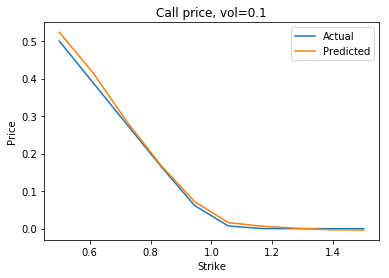

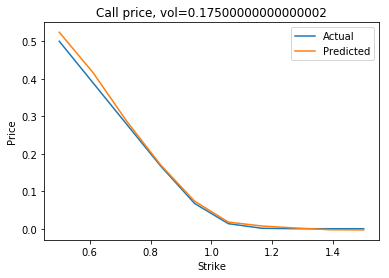

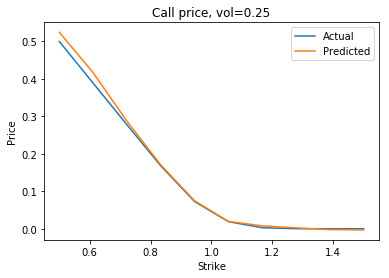

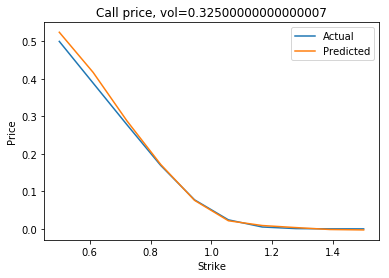

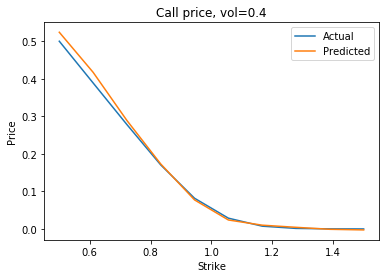

In [6]:
vols = np.linspace(0.1,0.4, 5)
for i in range(5):
    f, strike, t, vol = [1], np.linspace(0.5, 1.5, 10), vols[i], [0.2]
    model = create_model(layers, hidden_units, modelFile)
    inputs = np.array(np.meshgrid(f, strike, t, vol)).T.reshape(-1, 4)
    prices = blackScholesPriceTrue(inputs[:, 0], inputs[:, 1], inputs[:, 2], inputs[:, 3])
    pred_prices = model.predict(inputs)
    plt.figure(i)
    plt.title("Call price, vol={}".format(vols[i]))
    plt.plot(strike, prices, label='Actual')
    plt.plot(strike, pred_prices, label='Predicted')
    plt.xlabel("Strike")
    plt.ylabel("Price")
    plt.legend()